# Fonctions generales 


In [2]:

import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import re
from itertools import combinations
pd.set_option('display.max_colwidth', None)

In [3]:

def load(f):
    dataset = pd.read_csv(f)
    return dataset
def load_excel(f):
    dataset = pd.read_excel(f)
    return dataset
def info_dataset(dataset):
    dataset.info()
    print(dataset.head())
    print(dataset.shape)
def aff_nombres_manquants1(dataset, attr):
    dataset_sorted = dataset.sort_values(by=attr)
    column = dataset_sorted[attr]
    manquant = 0

    integer_pattern = re.compile(r'^[+-]?\d+$')
    decimal_pattern = re.compile(r'^[+-]?\d*\.\d+$')

    for i in column:
        if (integer_pattern.match(str(i)) or decimal_pattern.match(str(i))):
            continue
        else:
            manquant += 1

    print("Le nombre de valeurs manquantes est de :", manquant)
    print("Le pourcentage de valeurs manquantes est de:",
          manquant * 100 / len(dataset_sorted), '%')

def aff_nombres_manquants2(dataset,attr):
    dataset_sorted=dataset.sort_values(by=attr)
    column=dataset_sorted[attr]
    manquant=0
    
    for i in column :
        if (pd.isna(i)):
            manquant+=1
    print("le nombre de valeurs manquantes est de :",manquant,"\nle pourcentage de valeurs manquantes est de:",manquant*100/len(dataset_sorted),'%')
    x= manquant*100/len(dataset_sorted)
    return manquant,x
def centers(dataset, attr):
    # Sort dataset by given column
    dataset_sorted = dataset.sort_values(by=attr)
    # print(dataset_sorted)
    
    # Calculate moyenne
    avg = 0
    cpt = len(dataset_sorted)
    column = dataset_sorted[attr]
    # print("column: \n")
    # print(column)
    valid_count = 0
    
    for value in column:
        # Check the type of the value
        if not pd.isna(value) and value != '?':
            avg += float(value)
            valid_count += 1
    
    # Calculate the average only for valid numeric values
    avg = avg / valid_count if valid_count != 0 else 0
    
    # Calculate median
    if cpt % 2 == 0:  # pair
        idx1 = cpt // 2
        idx2 = (cpt // 2) - 1
        med = (column.iloc[idx1] + column.iloc[idx2]) / 2
    else:
        idx = cpt // 2
        med = column.iloc[idx]
    
    # Calculate mode
    # Count occurrences of each unique value
    counts = {}
    for value in column:
        # Check the type of the value
        if isinstance(value, (int, float)):
            counts[value] = counts.get(value, 0) + 1
    
    # Find the mode(s)
    mode_values = [key for key, value in counts.items() if value == max(counts.values())]
    
    if len(mode_values) == 1:
        # print('only one')
        mode = mode_values[0]
    else:
        # If multiple modes, return a tuple of modes
        # print('multiple')
        mode = tuple(mode_values)
        
    return avg, med, mode
def quartiles(dataset, attr):
    dataset_sorted = dataset.sort_values(by=attr)
    
    n = len(dataset_sorted)
    
    # Convert the column to numeric, coercing errors to NaN
    column = pd.to_numeric(dataset_sorted[attr], errors='coerce')
    # print(column)
    
    q0 = column.iloc[0]
    # q4 = column.iloc[-1]
    # q4_values = column.dropna().values  # Drop NaN values before selecting last element
    # q4 = q4_values[-1] if len(q4_values) > 0 else None  # Set q4 to None if there are no valid values
    q4 = column.max()
    
    # Calculate q2
    x, q2, _ = centers(dataset, attr)
    
    # calculate q1
    if n % 4 == 0:  # if divisible by 4 --> 1/4
        q1_idx1 = n // 4
        q1_idx2 = (n // 4) - 1
        q1 = (column.iloc[q1_idx1] + column.iloc[q1_idx2]) / 2
    else:
        q1_idx = n // 4
        q1 = column.iloc[q1_idx]
    
    # calculate q3
    if (3 * n) % 4 == 0:  # if 3 * n is divisible by 4 --> 3/4
        q3_idx1 = (3 * n) // 4
        q3_idx2 = ((3 * n) // 4) - 1
        q3 = (column.iloc[q3_idx1] + column.iloc[q3_idx2]) / 2
    else:
        q3_idx = (3 * n) // 4
        q3 = column.iloc[q3_idx]
    
    return q0, q1, q2, q3, q4

def load(f):
    dataset = pd.read_csv(f)
    return dataset
def load_excel(f):
    dataset = pd.read_excel(f)
    return dataset
def info_dataset(dataset):
    dataset.info()
    print(dataset.head())
    print(dataset.shape)
    return dataset.info(),dataset.head(),dataset.shape
def aff_nombres_manquants1(dataset, attr):
    dataset_sorted = dataset.sort_values(by=attr)
    column = dataset_sorted[attr]
    manquant = 0

    integer_pattern = re.compile(r'^[+-]?\d+$')
    decimal_pattern = re.compile(r'^[+-]?\d*\.\d+$')

    for i in column:
        if (integer_pattern.match(str(i)) or decimal_pattern.match(str(i))):
            continue
        else:
            manquant += 1

    print("Le nombre de valeurs manquantes est de :", manquant)
    print("Le pourcentage de valeurs manquantes est de:",
          manquant * 100 / len(dataset_sorted), '%')

def aff_nombres_manquants2(dataset,attr):
    dataset_sorted=dataset.sort_values(by=attr)
    column=dataset_sorted[attr]
    manquant=0
    
    for i in column :
        if (pd.isna(i)):
            manquant+=1
    print("le nombre de valeurs manquantes est de :",manquant,"\nle pourcentage de valeurs manquantes est de:",manquant*100/len(dataset_sorted),'%')
    x= manquant*100/len(dataset_sorted)
    return manquant,x
def centers(dataset, attr):
    # Sort dataset by given column
    dataset_sorted = dataset.sort_values(by=attr)
    # print(dataset_sorted)
    
    # Calculate moyenne
    avg = 0
    cpt = len(dataset_sorted)
    column = dataset_sorted[attr]
    # print("column: \n")
    # print(column)
    valid_count = 0
    
    for value in column:
        # Check the type of the value
        if not pd.isna(value) and value != '?':
            avg += float(value)
            valid_count += 1
    
    # Calculate the average only for valid numeric values
    avg = avg / valid_count if valid_count != 0 else 0
    
    # Calculate median
    if cpt % 2 == 0:  # pair
        idx1 = cpt // 2
        idx2 = (cpt // 2) - 1
        med = (column.iloc[idx1] + column.iloc[idx2]) / 2
    else:
        idx = cpt // 2
        med = column.iloc[idx]
    
    # Calculate mode
    # Count occurrences of each unique value
    counts = {}
    for value in column:
        # Check the type of the value
        if isinstance(value, (int, float)):
            counts[value] = counts.get(value, 0) + 1
    
    # Find the mode(s)
    mode_values = [key for key, value in counts.items() if value == max(counts.values())]
    
    if len(mode_values) == 1:
        # print('only one')
        mode = mode_values[0]
    else:
        # If multiple modes, return a tuple of modes
        # print('multiple')
        mode = tuple(mode_values)
        
    return avg, med, mode
def quartiles(dataset, attr):
    dataset_sorted = dataset.sort_values(by=attr)
    
    n = len(dataset_sorted)
    
    # Convert the column to numeric, coercing errors to NaN
    column = pd.to_numeric(dataset_sorted[attr], errors='coerce')
    # print(column)
    
    q0 = column.iloc[0]
    # q4 = column.iloc[-1]
    # q4_values = column.dropna().values  # Drop NaN values before selecting last element
    # q4 = q4_values[-1] if len(q4_values) > 0 else None  # Set q4 to None if there are no valid values
    q4 = column.max()
    
    # Calculate q2
    x, q2, _ = centers(dataset, attr)
    
    # calculate q1
    if n % 4 == 0:  # if divisible by 4 --> 1/4
        q1_idx1 = n // 4
        q1_idx2 = (n // 4) - 1
        q1 = (column.iloc[q1_idx1] + column.iloc[q1_idx2]) / 2
    else:
        q1_idx = n // 4
        q1 = column.iloc[q1_idx]
    
    # calculate q3
    if (3 * n) % 4 == 0:  # if 3 * n is divisible by 4 --> 3/4
        q3_idx1 = (3 * n) // 4
        q3_idx2 = ((3 * n) // 4) - 1
        q3 = (column.iloc[q3_idx1] + column.iloc[q3_idx2]) / 2
    else:
        q3_idx = (3 * n) // 4
        q3 = column.iloc[q3_idx]
    
    return q0, q1, q2, q3, q4
def analyse_dataset2(dataset,attr):
    q0, q1, q2, q3, q4=quartiles(dataset, attr)
    manquant,pourcentage=aff_nombres_manquants2(dataset,attr)
    avg,med, mode=centers(dataset, attr)
    return q0, q1, q2, q3, q4,manquant,pourcentage, avg,med, mode
def analyse_dataset1(dataset,attr):
    q0, q1, q2, q3, q4=quartiles(dataset, attr)
    manquant,pourcentage=aff_nombres_manquants2(dataset,attr)
    avg,med, mode=centers(dataset, attr)
    return q0, q1, q2, q3, q4,manquant,pourcentage, avg,med, mode


In [4]:
def box(dataset, attr):
    # Convert the data to numeric and create the histogram
    data = dataset[attr].apply(pd.to_numeric, errors='coerce').dropna()
    q0, q1, q2, q3, q4 = quartiles(dataset, attr)
    val = 1.5 * (q3 - q1)
    upper = q3 + val
    lower = q1 - val
    for value in data:
        if (value < lower) or (value > upper):
            print("Aberrant values in column", attr, "are", value)

    # Create a boxplot for the attribute
    plt.figure(figsize=(8, 6))
    plt.title(f"Boxplot for {attr}")
    plt.boxplot(data)
    plt.show()  # Show the boxplot for each attribute

    
def histogramme(dataset, attr):
    # Filtrer les valeurs non numériques
    data = dataset[attr].apply(pd.to_numeric, errors='coerce').dropna()
        # Créer un histogramme pour chaque attr
    plt.figure(figsize=(8, 6))
    plt.title(f"Histogramme pour {attr}")
    plt.hist(data, bins='auto', edgecolor='black')
    plt.show()
    
def scatterplot(dataset, attr1, attr2):
    x = dataset[attr1]
    y = dataset[attr2]
    plt.scatter(x, y)
    plt.title(f'Scatter plot between {attr1} and {attr2}')
    plt.xlabel(f'Values of {attr1}')
    plt.ylabel(f'Values of {attr2}')
    plt.show()

# DATASET 1

In [5]:
dataset1 = load("Dataset1.csv")

## Analyse

In [6]:
def analyse1(dataset,attr):
    info_dataset(dataset)
    aff_nombres_manquants1(dataset, attr)
    if attr != 'end date' and attr != 'Start date':
        print('COLUMN:', attr)
        avg, med, mode = centers(dataset,attr)
        # Check if avg = med = mode
        print('AVERAGE: ', avg, '...', 'MEDIAN: ', med, 'MODE: ', mode)
        if avg == med == mode:
            print("The average, median, and mode are equal. SYMMETRICAL")
        else:
            print("The average, median, and mode are not equal. NOT SYMMETRICAL")
        q0, q1, q2, q3, q4 = quartiles(dataset, attr)
        print('q0: ', q0)
        print('q1: ', q1)
        print('q2: ', q2)
        print('q3: ', q3)
        print('q4: ', q4)
analyse1(dataset1,'P')
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885 entries, 0 to 884
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   N          885 non-null    int64  
 1   P          885 non-null    object 
 2   K          885 non-null    int64  
 3   pH         885 non-null    float64
 4   EC         885 non-null    float64
 5   OC         884 non-null    float64
 6   S          885 non-null    float64
 7   Zn         885 non-null    float64
 8   Fe         885 non-null    float64
 9   Cu         884 non-null    float64
 10  Mn         885 non-null    float64
 11  B          885 non-null    float64
 12  OM         885 non-null    float64
 13  Fertility  885 non-null    int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 96.9+ KB
     N    P    K    pH    EC    OC     S    Zn    Fe    Cu    Mn     B  \
0  138  8.6  560  7.46  0.62  0.70   5.9  0.24  0.31  0.77  8.71  0.11   
1  213  7.5  338  7.62  0.75  1.06  25.4  0

Aberrant values in column N are 38
Aberrant values in column N are 19
Aberrant values in column N are 38
Aberrant values in column N are 25
Aberrant values in column N are 31
Aberrant values in column N are 19
Aberrant values in column N are 6
Aberrant values in column N are 13
Aberrant values in column N are 6
Aberrant values in column N are 31
Aberrant values in column N are 6
Aberrant values in column N are 25
Aberrant values in column N are 31


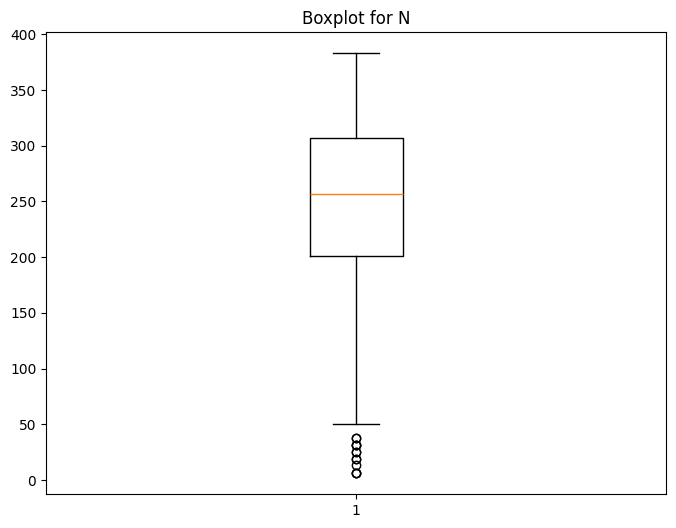

In [7]:
box(dataset1,'N')


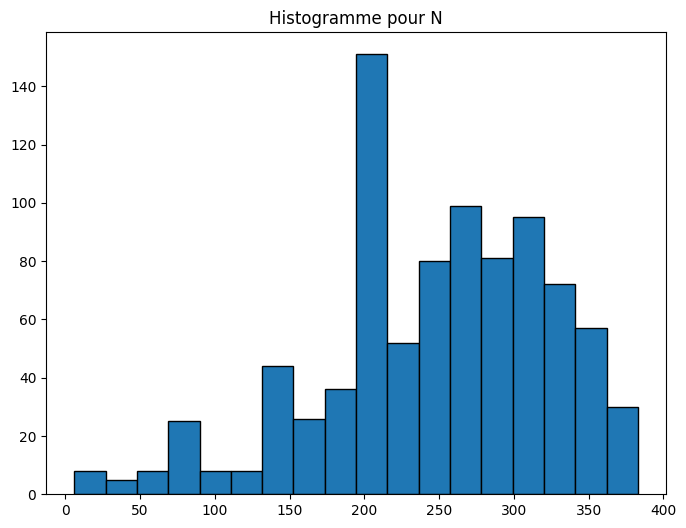

In [8]:
histogramme(dataset1,'N')

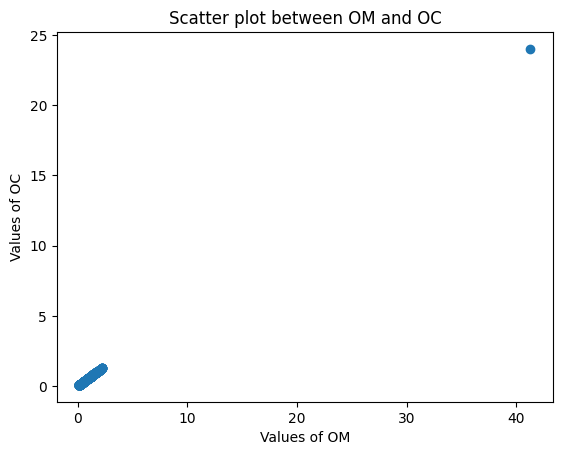

In [9]:
scatterplot(dataset1, 'OM', 'OC')

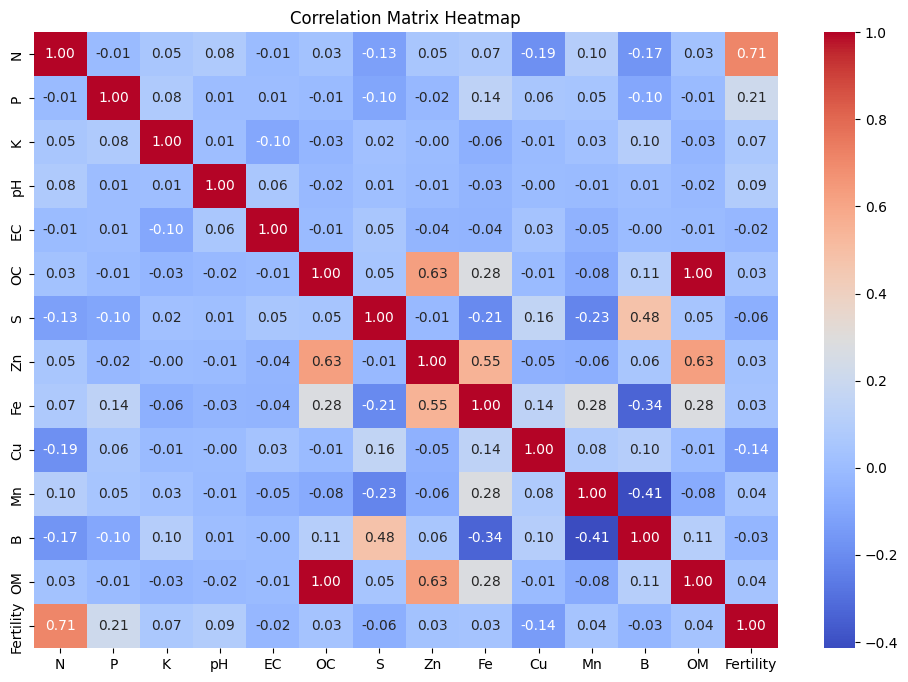

In [10]:
import seaborn as sns
def correlation(dataset):
    # Replace non-numeric values (e.g., '?') with NaN
    dataset_numeric = dataset.apply(pd.to_numeric, errors='coerce')

    # Calculate the correlation matrix for the cleaned dataset
    correlation_matrix = dataset_numeric.corr()

    # Create a heatmap of the correlation matrix
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()
correlation(dataset1)

## Pretraitement

In [11]:
def replace_missing(dataset, attr):
    integer_pattern = re.compile(r'^[+-]?\d+$')
    decimal_pattern = re.compile(r'^[+-]?\d*\.\d+$')

    # Replace values that don't match integer_pattern or decimal_pattern with NaN
    dataset[attr] = dataset[attr].apply(lambda x: x if pd.isna(x) or integer_pattern.match(str(x)) or decimal_pattern.match(str(x)) else np.nan)

    # Convert the attribute to numeric (assuming it's a numerical column)
    # Replace NaN with the mean of instances belonging to the same class
    for class_value in [0, 1, 2]:
        mask = dataset['Fertility'] == class_value
        mean_value = dataset.loc[mask, attr].astype(float).mean()
        dataset.loc[mask, attr] = dataset.loc[mask, attr].astype(float).fillna(mean_value)

    # Verify the changes
    return dataset

### Binning

In [12]:
def define_k(dataset):
    n = len(dataset)
    k = 1 +(10/3) * math.log10(n)
    return int(math.ceil(k))-1
def categorize(dataset, k):
    categories = []
    dataset_length = len(dataset)
    
    for i in range(k):
        # max_val_index = int(dataset_length * (i + 1) / k)
        
        min_val_index = int(dataset_length * i / k)
        # print('min ', min_val_index)
        max_val_index = int(dataset_length * (i + 1) / k)
        # print('max ', max_val_index)
        interval = dataset[min_val_index:max_val_index]
        
        categories.append(interval)

    return categories
def discretise(dataset, attr):
    
    dataset_sorted = dataset.sort_values(by=attr)
    x = dataset_sorted[attr]
    
    # define the number of ranges K
    k = define_k(x)
    categories = categorize(x, k) 
    
    # calculate the average for each category and replace values with the average
    for i, category in enumerate(categories):
        avg = category.mean()
        categories[i] = pd.Series([avg] * len(category), index=category.index)

    # combine all categories back into a single Series
    new_dataset = pd.concat(categories)
    dataset[attr] = new_dataset

    return dataset
def binning(dataset, dataset2, min_threshold , max_threshold , attr):
    x = dataset[attr]
    
    
    mask = (x > max_threshold) | (x < min_threshold)
    dataset.loc[mask, attr] = dataset2.loc[mask, attr].astype(dataset[attr].dtype)
    
    return dataset

### Winsorizing

In [13]:

def winsorizing(dataset, attr):
    x = dataset[attr].copy()  # Make a copy of the column
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    val = 1.5 * (q3 - q1)
    below_q1 = q1 - val
    print('below: ', below_q1)
    above_q3 = q3 + val
    print('above: ', above_q3)
    
    # Replace outliers with below_q1 or above_q3
    x.loc[x < below_q1] = below_q1
    x.loc[x > above_q3] = above_q3
    
    dataset[attr] = x
    return dataset

In [14]:
def treat_outliers(dataset,method):
    if (method=="binning"):
        dataset_discretized=dataset.copy()
        for attr in dataset.columns:
            if (attr != 'Fertility'):
                print('COLUMN:', attr)
                dataset_discretized = discretise(dataset_discretized.copy(), attr)
        dataset = binning(dataset.copy(), dataset_discretized, 100, 500, 'N')
        dataset = binning(dataset.copy(), dataset_discretized, 0, 80, 'P')
        dataset = binning(dataset.copy(), dataset_discretized, 40, 80, 'K')
        dataset = binning(dataset.copy(), dataset_discretized, 3, 9, 'pH')
        dataset = binning(dataset.copy(), dataset_discretized, 0.11, 0.57, 'EC')
        dataset = binning(dataset.copy(), dataset_discretized, 0, 14, 'OC')
        dataset = binning(dataset.copy(), dataset_discretized, 0, 18, 'S')
        dataset = binning(dataset.copy(), dataset_discretized, 0.12, 2.17, 'Zn')
        dataset = binning(dataset.copy(), dataset_discretized, 0.2, 55, 'Fe')
        dataset = binning(dataset.copy(), dataset_discretized, 0, 3.0, 'Cu')
        dataset = binning(dataset.copy(), dataset_discretized, 0.1, 13, 'Mn')
        dataset = binning(dataset.copy(), dataset_discretized, 0.04, 7.40, 'B')
        dataset = binning(dataset.copy(), dataset_discretized, 0, 20, 'OM')
        print("binning is being executed")
    elif method=="winsorizing":
        for attr in dataset.columns:
            if attr != 'Fertility':
                print('COLUMN:', attr)
                dataset = winsorizing(dataset.copy(), attr)
    return dataset


In [15]:
def count_identical_rows(dataset):
    df = pd.DataFrame(dataset)
    duplicate_rows = df[df.duplicated()]
    num_identical_rows = len(duplicate_rows)

    return num_identical_rows

In [16]:
def remove_identical_rows(dataset):
    df = pd.DataFrame(dataset)
    
    # Identify and store duplicated rows
    duplicated_rows = df[df.duplicated()]
    
    # Remove identical rows from the dataset
    df_no_duplicates = df.drop_duplicates()
    
    # Convert the results back to lists
    deleted_rows = duplicated_rows.values.tolist()

    return df_no_duplicates, deleted_rows

In [17]:
def min_max_normalize(dataset, attr, new_min=0, new_max=1):
    # Trouver les valeurs minimales et maximales dans le dataset
    x = dataset[attr]
    min_val = x.min()
    max_val = x.max()
    
    # Appliquer la normalisation Min-Max
    normalized_data = (x - min_val) / (max_val - min_val) * (new_max - new_min) + new_min
    dataset[attr] = normalized_data
    
    return dataset

In [18]:
def z_score_normalization(dataset, attr):
    # Calculate mean and standard deviation
    #print(dataset)
    data=dataset[attr]
    #print(data)
    mean = np.mean(data)
    std_dev = np.std(data)
    
    # Z-score normalization
    normalized_data = (data - mean) / std_dev
    dataset[attr] = normalized_data
    
    return dataset

In [19]:
def preprocessing1(dataset,treat_outliers_method,normalize_method):
    dataset = load("Dataset1.csv")
    for attr in dataset.columns:
        dataset = replace_missing(dataset.copy(), attr)
    dataset=treat_outliers(dataset,treat_outliers_method)
    print("TEST",dataset)
    result = count_identical_rows(dataset)
    print(f"Number of identical rows: {result}")
    dataset, deleted = remove_identical_rows(dataset)
    print("\nDeleted rows:")
    for row in deleted:
        print(row)
    dataset = dataset.drop(columns=['OM'])
    print(dataset)
    for attr in dataset.columns:
        if attr != 'Fertility':
            print('COLUMN:', attr)
            dataset = normalize_method(dataset.copy(), attr)
    return dataset


Aberrant values in column N are 38
Aberrant values in column N are 19
Aberrant values in column N are 38
Aberrant values in column N are 25
Aberrant values in column N are 31
Aberrant values in column N are 19
Aberrant values in column N are 6
Aberrant values in column N are 13
Aberrant values in column N are 6
Aberrant values in column N are 31
Aberrant values in column N are 6
Aberrant values in column N are 25
Aberrant values in column N are 31


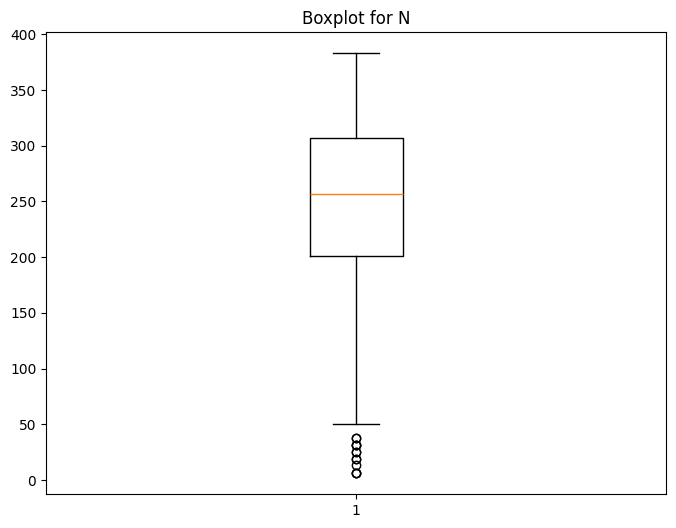

In [20]:
box(dataset1,'N')

In [21]:
dataset1=preprocessing1(dataset1,'binning',z_score_normalization)


COLUMN: N
COLUMN: P
COLUMN: K
COLUMN: pH
COLUMN: EC
COLUMN: OC
COLUMN: S
COLUMN: Zn
COLUMN: Fe
COLUMN: Cu
COLUMN: Mn
COLUMN: B
COLUMN: OM
binning is being executed
TEST        N     P    K    pH        EC    OC         S    Zn    Fe    Cu  \
0    138   8.6  541  7.46  0.606136  0.70   5.90000  0.24  0.31  0.77   
1    213   7.5  311  7.62  0.794382  1.06  17.63382  0.30  0.86  1.54   
2    163   9.6  748  7.59  0.510000  1.11  14.30000  0.30  0.86  1.57   
3    157   6.8  462  7.64  0.569101  0.94  17.63382  0.34  0.54  1.53   
4    270   9.9  441  7.63  0.400000  0.86  11.80000  0.25  0.76  1.69   
..   ...   ...  ...   ...       ...   ...       ...   ...   ...   ...   
880  276   9.2  375  7.62  0.606136  0.49   6.64000  0.42  3.57  0.63   
881  320  13.8  375  7.38  0.638202  1.07   5.43000  0.58  4.58  1.02   
882  264  10.3  462  7.49  0.794382  0.88  10.56000  0.45  7.36  1.87   
883  220   8.6  441  7.43  0.638202  0.72  11.70000  0.37  0.66  0.90   
884  270   8.1  636  7.45  0

In [22]:
dataset1

,N,P,K,pH,EC,OC,S,Zn,Fe,Cu,Mn,B,Fertility
0,-1.509505,-0.275771,0.328864,-0.194880,0.449445,0.362939,-0.400219,-1.068501,-1.233029,-0.392372,0.015896,-0.841264,0
1,-0.485269,-0.341382,-1.535003,0.385792,1.798369,1.573914,3.029358,-0.619126,-1.055895,1.278077,-1.380879,2.983360,0
2,-1.168093,-0.216124,2.006345,0.276916,-0.239445,1.742105,2.054945,-0.619126,-1.055895,1.343160,-1.426478,2.527212,0
3,-1.250032,-0.383134,-0.311334,0.458376,0.184060,1.170256,3.029358,-0.319543,-1.158955,1.256383,-1.438478,2.158785,0
4,0.293150,-0.19823,-0.481513,0.422084,-1.027678,0.901150,1.324241,-0.993605,-1.088101,1.603489,-1.491277,2.930727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
878,1.399324,-0.150513,1.098723,1.619719,-0.239445,-1.016228,-0.008562,-0.169751,0.177601,-0.565925,0.572686,0.176297,1
879,0.211211,-0.251912,-0.027702,-0.993304,-0.526075,-1.655354,-0.978936,-0.244647,1.327362,-1.086584,-0.159301,-0.332483,1
880,0.375089,-0.239983,-1.016362,0.385792,0.449445,-0.343464,-0.183930,0.279624,-0.183108,-0.696090,-0.519295,-0.472837,1
881,0.975974,0.034391,-1.016362,-0.485216,0.679222,1.607552,-0.537591,1.477957,0.142175,0.149982,1.066368,-0.104410,2


## Classification

### Fonctions communes

In [23]:
# Définition des distances
def distance_manhattan(instance1, instance2):
    return np.sum(np.abs(instance1 - instance2))

def distance_euclidienne(instance1, instance2):
    # print('instance1')
    # print(instance1)
    # print('instance2')
    # print(instance2)
    return np.sqrt(np.sum((instance1 - instance2)**2))

def distance_minkowski(instance1, instance2, p):
    # print('DISTANCE',np.power(np.sum(np.abs(instance1 - instance2)**p), 1/p))
    return np.power(np.sum(np.abs(instance1 - instance2)**p), 1/p)

# def distance_cosine(instance1, instance2):
#     dot_product = np.dot(instance1, instance2)
#     norm_instance1 = np.linalg.norm(instance1)
#     norm_instance2 = np.linalg.norm(instance2)
#     return 1 - (dot_product / (norm_instance1 * norm_instance2))
def distance_cosine(instance1, instance2):
    common_length = min(len(instance1), len(instance2))
    dot_product = np.dot(instance1[:common_length], instance2[:common_length])
    norm_instance1 = np.linalg.norm(instance1[:common_length])
    norm_instance2 = np.linalg.norm(instance2[:common_length])
    return 1 - (dot_product / (norm_instance1 * norm_instance2))


# def distance_hamming(instance1, instance2):
#     return np.sum(instance1 != instance2)
def distance_hamming(instance1, instance2):
    # Assuming both instances are pandas Series
    distance = 0
    for attr1, attr2 in zip(instance1, instance2):
        if pd.api.types.is_numeric_dtype(attr1) and pd.api.types.is_numeric_dtype(attr2):
            # For numeric attributes, calculate absolute difference
            distance += np.abs(attr1 - attr2)
        elif attr1 != attr2:
            # For non-numeric attributes, check for inequality
            distance += 1
    return distance
# Calcul de distance entre deux instances
def calculer_distance(instance1, instance2, distance_type):
    if distance_type == 'manhattan':
        return distance_manhattan(instance1, instance2)
    elif distance_type == 'euclidean':
        return distance_euclidienne(instance1, instance2)
    elif distance_type == 'minkowski':
        # Vous devez spécifier la valeur de p pour la distance de Minkowski
        p = 3  # Vous pouvez changer la valeur de p selon vos besoins
        return distance_minkowski(instance1, instance2, p)
    elif distance_type == 'cosine':
        return distance_cosine(instance1, instance2)
    elif distance_type == 'hamming':
        return distance_hamming(instance1, instance2)
    else:
        raise ValueError("Distance type non pris en charge")
# 2. Trier les instances selon la distance calculée
def trier_par_distance(dataset, y_train, instance, distance_type):
    datasetcopy=dataset.copy()
    y_train_copy2=y_train.copy()    
    distances = [calculer_distance(instance, row, distance_type) for _, row in datasetcopy.iterrows()]
    datasetcopy['distance'] = distances
    y_train_copy2['distance'] = distances
    # print(datasetcopy['distance'])
    datasetcopy = datasetcopy.sort_values(by='distance')
    
    # y_train = y_train.sort_values(by='distance')
    sorted_indices = np.argsort(distances)
    y_train_copy = y_train_copy2.iloc[sorted_indices]
    

    return  y_train_copy
def classe_dominante(classes):
    return max(set(classes), key=classes.count)


C:\Users\User\AppData\Local\Temp\ipykernel_9456\3688327049.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


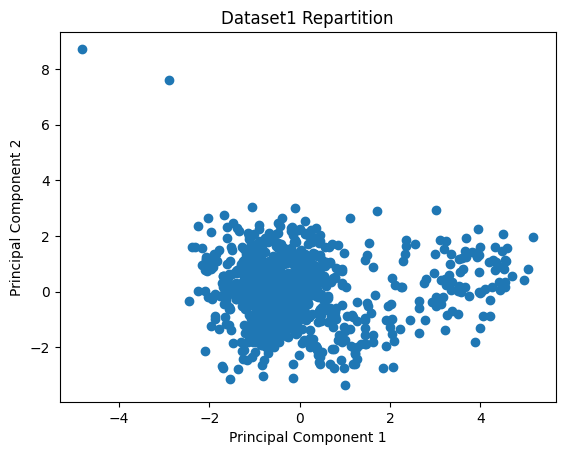

In [24]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset1)

# Plotting the clusters in the reduced 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.title('Dataset1 Repartition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
def split_dataset(dataset):
    # Remove the 'Fertility' column from X (features)
    X = dataset.drop('Fertility', axis=1)

    # Set 'Fertility' as the target variable (y)
    y = dataset['Fertility']

    # Use train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.8, random_state=42)
    return X_train, X_test, y_train, y_test

In [26]:
X_train, X_test, y_train, y_test = split_dataset(dataset1)

C:\Users\User\AppData\Local\Temp\ipykernel_9456\143953203.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')


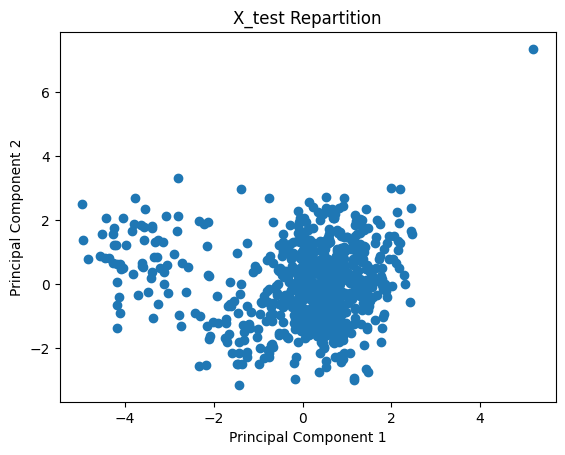

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Plotting the clusters in the reduced 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], cmap='viridis')
plt.title('X_test Repartition')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## ANALYSE SUPERVISEE

In [28]:
X_train, X_test, y_train, y_test = split_dataset(dataset1)

### KNN

In [29]:
def knn(dataset, y_train, instance, k, distance_type):
    y_train_trie = trier_par_distance(dataset, y_train, instance, distance_type)
    k_plus_proches = y_train_trie.head(k)
    # print(y_train_trie)
    classes_k_plus_proches = list(k_plus_proches)
    return classe_dominante(classes_k_plus_proches)

In [30]:
def execute_knn(dataset,distance_type,k_value):
    X_train, X_test, y_train, y_test = split_dataset(dataset)
    # Assuming X_test is your testing feature matrix
    # Initialize an empty array to store predictions
    y_pred_knn = []
    # Loop through all instances in X_test
    for instance_index in range(len(X_test)):
        # Extract the instance using iloc
        selected_instance = X_test.iloc[[instance_index]].iloc[0]

        # Make KNN prediction for the current instance
        classe_predite = knn(X_train, y_train, selected_instance, k_value,distance_type)

        # Append the prediction to the array
        y_pred_knn.append(classe_predite)
        # Print or use the array of predictions as needed
    print("All Predictions:", y_pred_knn)
    return y_pred_knn

y_pred_knn = execute_knn(dataset1,'cosine',5)


All Predictions: [0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1

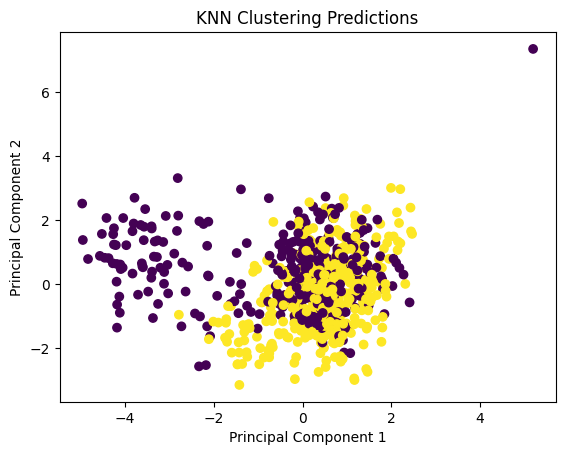

In [31]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction (adjust n_components as needed)
X_train, X_test, y_train, y_test = split_dataset(dataset1)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)
# Plotting the clusters in the reduced 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_knn, cmap='viridis')
plt.title('KNN Clustering Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Decision Tree

In [32]:
labels = ['Low', 'Medium', 'High']

In [33]:
import math
import pandas as pd


def categorize_freq(dataset, labels):
    categories = []
    dataset_sorted = dataset.sort_values()
    dataset_length = len(dataset_sorted)

    for i in range(len(labels)):
        min_val_index = int(dataset_length * i / len(labels))
        max_val_index = int(dataset_length * (i + 1) / len(labels))
        interval = dataset_sorted[min_val_index:max_val_index]
        categories.append((interval, labels[i]))

    return categories

def discretise_freq(dataset, attr, labels):
    dataset_sorted = dataset.sort_values(by=attr)
    x = dataset_sorted[attr]
    
    # categorize
    categories = categorize_freq(x, labels)
    # print(categories)

    # replace values with labels
    for i, (category, label) in enumerate(categories):
        categories[i] = pd.Series([label] * len(category), index=category.index)

    # combine all categories back into a single Series
    new_dataset = pd.concat(categories)
    dataset[attr] = new_dataset

    return dataset

dataset_discretized = dataset1.copy()
for attr in dataset1.columns:
    if attr != 'Fertility':
        # print('COLUMN:', attr)
        dataset_discretized = discretise_freq(dataset_discretized.copy(), attr, labels)
print(dataset_discretized)


          N       P       K      pH      EC      OC       S      Zn      Fe  \
0       Low  Medium  Medium  Medium    High  Medium  Medium     Low     Low   
1    Medium  Medium     Low    High    High    High    High     Low     Low   
2       Low    High    High  Medium  Medium    High    High     Low     Low   
3       Low     Low  Medium    High  Medium    High    High  Medium     Low   
4    Medium    High  Medium    High     Low    High    High     Low     Low   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
878    High    High    High    High  Medium     Low  Medium  Medium  Medium   
879  Medium  Medium  Medium     Low     Low     Low     Low  Medium    High   
880  Medium    High     Low    High    High  Medium  Medium    High  Medium   
881    High    High     Low     Low    High    High  Medium    High  Medium   
882  Medium    High  Medium  Medium    High    High    High    High    High   

         Cu      Mn       B  Fertility  
0    Mediu

In [34]:

X_train, X_test, y_train, y_test = split_dataset(dataset_discretized)


In [35]:

import pandas as pd
import math

class Node:
    def __init__(self, attribute=None, value=None, results=None, branches=None):
        self.attribute = attribute  # Attribute to split on
        self.value = value  # Value of the attribute for the split
        self.results = results  # Outcome for leaf nodes
        self.branches = branches  # Subtrees

def entropy(data):
    # Calculate the entropy of a dataset
    results = data['Fertility'].value_counts(normalize=True)
    entropy = -sum(p * math.log2(p) for p in results)
    return entropy

def split_data(data, attribute, value):
    # Split dataset based on a particular attribute and its value
    subset = data[data[attribute] == value]
    return subset

def information_gain(data, attribute):
    # Calculate the information gain for a specific attribute
    original_entropy = entropy(data)
    values = data[attribute].unique()
    weighted_entropy = sum(len(subset) / len(data) * entropy(subset) for value, subset in data.groupby(attribute))
    information_gain = original_entropy - weighted_entropy
    return information_gain

def id3(data, available_attributes):
    # Recursive ID3 algorithm
    # Base case: if all examples have the same class, create a leaf node with that class
    if len(data['Fertility'].unique()) == 1:
        return Node(results=data['Fertility'].iloc[0])

    # Base case: if there are no more attributes to split on, create a leaf node with the majority class
    if not available_attributes:
        majority_class = data['Fertility'].mode().iloc[0]
        return Node(results=majority_class)

    # Otherwise, choose the best attribute to split on and create a node
    best_attribute = max(available_attributes, key=lambda attr: information_gain(data, attr))
    available_attributes.remove(best_attribute)

    node = Node(attribute=best_attribute)
    
    # Create branches dictionary
    node.branches = {}
    
    # Recur on each branch of the node
    for value, subset in data.groupby(best_attribute):
        if len(subset) == 0:
            majority_class = data['Fertility'].mode().iloc[0]
            node.branches[value] = Node(results=majority_class)
        else:
            node.branches[value] = id3(subset, available_attributes.copy())

    return node



def predict(node, example):
    # Predict the class for a given example using the decision tree
    if node.results is not None:
        return node.results
    else:
        value = example[node.attribute]
        if value not in node.branches:
            # If the value is not in the training set, return the majority class of the entire node
            return max(node.branches.values(), key=lambda x: (x.results if x.results is not None else 0)).results
        else:
            return predict(node.branches[value], example)

def print_tree(node, indent=''):
    # Print the decision tree
    if node.results is not None:
        print(f"Leaf Node: {node.results}")
    else:
        print(f"Attribute: {node.attribute}")
        for value, branch in node.branches.items():
            print(f"{indent}Value {value}:")
            print_tree(branch, indent + '  ')

In [36]:
def execute_decision_tree(dataset):
    dataset_discretized = dataset.copy()
    for attr in dataset.columns:
        if attr != 'Fertility':
            # print('COLUMN:', attr)
            dataset_discretized = discretise_freq(dataset_discretized.copy(), attr, labels)
    # Assuming 'df' is your DataFrame
    X_train, X_test, y_train, y_test = split_dataset(dataset_discretized)
    attributes = X_train.columns.tolist()
    print(attr)
    root = id3(pd.concat([X_train, y_train], axis=1), attributes)
    
    # Print the decision tree
    print_tree(root)
    
    # Example of making predictions on the dataset
    y_pred_dt = []
    for index, example in X_test.iterrows():
        prediction = predict(root, example)
        y_pred_dt.append(prediction)
        print(f"Example {index}: Predicted Fertility = {prediction}")
    # Print or use the array of predictions as needed
    print("All Predictions:", y_pred_dt)
    return y_pred_dt
y_pred_dt = execute_decision_tree(dataset1)

Fertility
Attribute: N
Value High:
Attribute: P
  Value High:
Attribute: S
    Value High:
Leaf Node: 1
    Value Low:
Attribute: Cu
      Value High:
Leaf Node: 1
      Value Low:
Leaf Node: 2
      Value Medium:
Attribute: K
        Value High:
Leaf Node: 1
        Value Low:
Leaf Node: 2
    Value Medium:
Attribute: OC
      Value High:
Leaf Node: 2
      Value Low:
Leaf Node: 1
      Value Medium:
Attribute: K
        Value High:
Leaf Node: 1
        Value Medium:
Leaf Node: 2
  Value Low:
Leaf Node: 1
  Value Medium:
Leaf Node: 1
Value Low:
Attribute: P
  Value High:
Attribute: Zn
    Value High:
Leaf Node: 1
    Value Low:
Attribute: pH
      Value High:
Leaf Node: 0
      Value Low:
Leaf Node: 1
    Value Medium:
Leaf Node: 0
  Value Low:
Attribute: Zn
    Value High:
Leaf Node: 2
    Value Low:
Attribute: S
      Value High:
Attribute: K
        Value Low:
Leaf Node: 1
        Value Medium:
Leaf Node: 0
      Value Low:
Leaf Node: 0
      Value Medium:
Leaf Node: 0
    Value Me

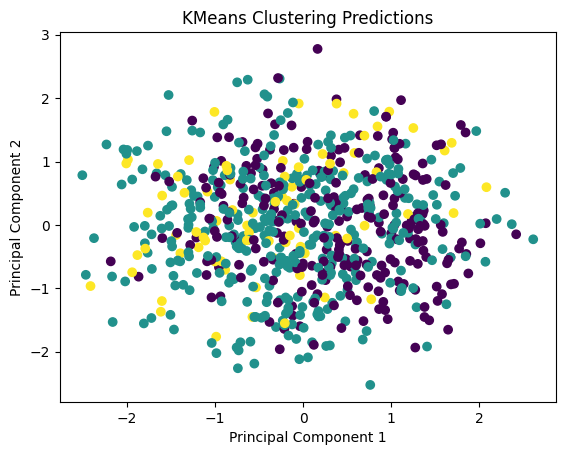

In [37]:
from sklearn.preprocessing import LabelEncoder

# Example: Encoding a categorical column in X_test
label_encoder = LabelEncoder()
for column in X_test.columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])

# Now, you can proceed with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test)

# Plotting the clusters in the reduced 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_dt, cmap='viridis')
plt.title('KMeans Clustering Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


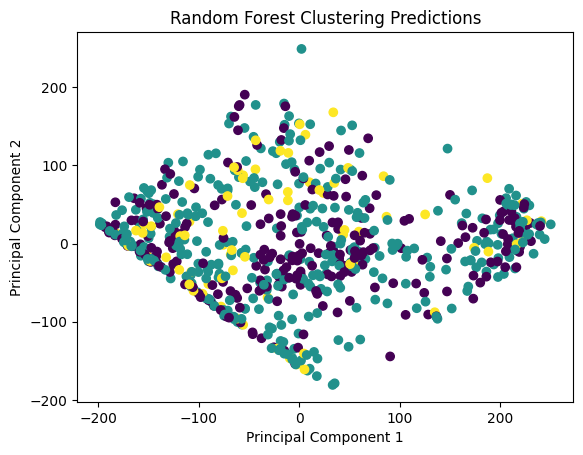

In [38]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=2)
X_train, X_test, y_train, y_test = split_dataset(dataset1)
label_encoder = LabelEncoder()
for column in X_test.columns:
    X_test[column] = label_encoder.fit_transform(X_test[column])
    

X_pca = pca.fit_transform(X_test)

# Plotting the clusters in the reduced 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_dt, cmap='viridis')
plt.title('Random Forest Clustering Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

### Random Forest

In [39]:
X_train, X_test, y_train, y_test = split_dataset(dataset_discretized)

In [40]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
def execute_random_forest(dataset,num_trees):

    dataset_discretized = dataset.copy()
    for attr in dataset.columns:
        if attr != 'Fertility':
            # print('COLUMN:', attr)
            dataset_discretized = discretise_freq(dataset_discretized.copy(), attr, labels)
    # Assuming 'df' is your DataFrame
    X_train, X_test, y_train, y_test = split_dataset(dataset_discretized)
    # List to store the decision trees
    forest = []
    
    # Train multiple decision trees
    for _ in range(num_trees):
        # Randomly sample with replacement for each tree
        X_subset, y_subset = X_train.sample(frac=1, replace=True, random_state=_), y_train.sample(frac=1, replace=True, random_state=_)
    
        # Get available attributes for each tree
        attributes = X_subset.columns.tolist()
    
        # Build the decision tree
        tree_root = id3(pd.concat([X_subset, y_subset], axis=1), attributes)
        
        # Append the decision tree to the forest
        forest.append(tree_root)
    
    # Make predictions for each test example
    def predict_forest(forest, example):
        predictions = [predict(tree, example) for tree in forest]
        # For simplicity, using majority voting for classification
        return max(set(predictions), key=predictions.count)
    
    # Evaluate the Random Forest on the test set
    
    y_pred_rf = []
    for index, example in X_test.iterrows():
        prediction = predict_forest(forest, example)
        y_pred_rf.append(prediction)
    # Print or use the array of predictions as needed
    print("All Predictions:", y_pred_rf)
    return y_pred_rf
execute_random_forest(dataset1,5)

All Predictions: [0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 0,


## ANALYSE NON SUPERVISEE

### K_means

In [41]:
import random
import pandas as pd
import numpy as np

def init_centroids(dataset, k):
    print('init_centroids')
    dataset_copy = dataset.copy()  # Copy the DataFrame to avoid unexpected modifications
    list_rand = random.sample(range(len(dataset_copy)), k)
    list_centroids = []

    for instance_index in list_rand:
        instance = np.array(dataset_copy.iloc[instance_index, :])
        list_centroids.append(instance)

    return list_centroids, dataset_copy


def kmeans_plusplus_init(X, k):
    # Reset the index of the DataFrame
    X_reset = X.reset_index(drop=True)

    # Step 1: Choose the first centroid randomly from the dataset
    centroids = [X_reset.iloc[np.random.choice(X_reset.shape[0])]]

    # Step 2: Choose the remaining k-1 centroids using KMeans++ algorithm
    for _ in range(1, k):
        # Calculate squared distances from each data point to the nearest existing centroid
        distances = np.array([min(np.linalg.norm(np.array(x) - np.array(c))**2 for c in centroids) for x in X_reset.values])
        
        # Choose the next centroid with probability proportional to the squared distance
        probabilities = distances / distances.sum()
        new_centroid_index = np.random.choice(X_reset.shape[0], p=probabilities)
        new_centroid = X_reset.iloc[new_centroid_index]

        centroids.append(new_centroid)

    return np.array(centroids), X
def calculer_centroide(cluster):
    return np.mean(cluster, axis=0)

def trouver_cluster_plus_proche(instance, centroids, distance_type):
    distances = [calculer_distance(instance, centroid, distance_type) for centroid in centroids]
    return np.argmin(distances)

def kmeans(dataset, k, distance_type, init_type, convergence_threshold=1e-7):
    # Étape 6: Initialisation des centroids
    centroids, dataset_copy = init_type(dataset, k)
    close = False
    iteration = 0
    while(not close):
        iteration +=1
        # Assigner chaque instance au cluster le plus proche
        clusters = [[] for _ in range(k)]
        for _, row in dataset_copy.iterrows():
            # instance = np.array(row[:-1]) 
            instance = np.array(row) 
            cluster_index = trouver_cluster_plus_proche(instance, centroids, distance_type)
            clusters[cluster_index].append(instance)

        # Mettre à jour les centroids
        new_centroids = [calculer_centroide(cluster) for cluster in clusters]

        
        # Vérifier la convergence
        if iteration > 0:
            similarity_metric = np.sum([distance_euclidienne(c1, c2) for c1, c2 in zip(centroids, new_centroids)])
            # print(similarity_metric)
            
            if similarity_metric < convergence_threshold:
                # print("THEY ARE CLOSE !!!!!!!!!!!!!!!!")
                close = True 
                
        # if np.array_equal(new_centroids, centroids) | close:
        #     close = True
        #     print('BREAAAAAAAAAAAAAAAAAAAAK at ', iteration)
            

        centroids = new_centroids

    # Déduire les clusters formés
    cluster_assignments = []
    for _, row in dataset_copy.iterrows():
        # instance = np.array(row[:-1])
        instance = np.array(row) 
        cluster_index = trouver_cluster_plus_proche(instance, centroids, distance_type)
        cluster_assignments.append(cluster_index)

    return cluster_assignments


In [42]:
def execute_kmeans(dataset,k_value,distance_type,init_type):
    # Assuming X_test is your testing feature matrix
    # Initialize an empty array to store predictions
    y_pred_kmean = []
    X = dataset.drop('Fertility', axis=1)

    # Make KNN prediction for the current instance
    cluster_assignments = kmeans(X, k_value,distance_type,init_type)

    # Append the prediction to the array
    y_pred_kmean = cluster_assignments

    # Print or use the array of predictions as needed
    print("All Predictions:", y_pred_kmean)
    return y_pred_kmean
y_pred_kmean = execute_kmeans(dataset1,3,'euclidean',kmeans_plusplus_init)

All Predictions: [1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

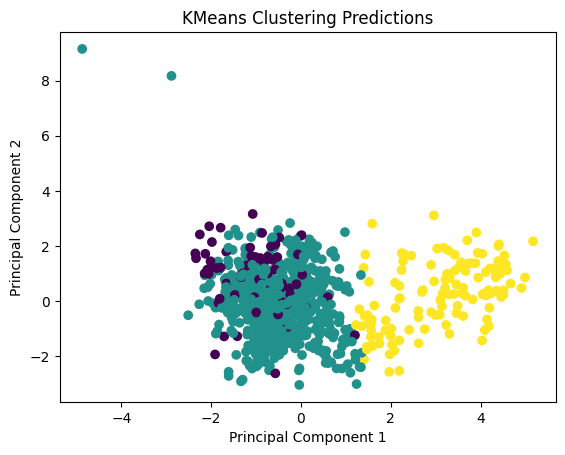

In [43]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = dataset1.copy()
X = X.drop('Fertility', axis=1)

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters in the reduced 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmean, cmap='viridis')
plt.title('KMeans Clustering Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [44]:

y_pred_kmean_cent = execute_kmeans(dataset1,3,'euclidean',init_centroids)

init_centroids
All Predictions: [0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0

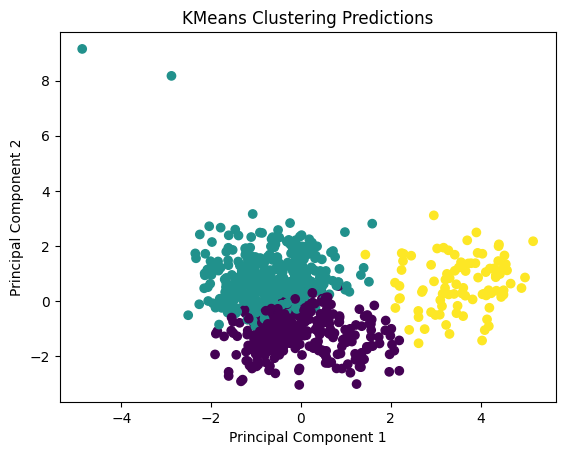

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

X = dataset1.copy()
X = X.drop('Fertility', axis=1)

# Apply PCA for dimensionality reduction (adjust n_components as needed)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotting the clusters in the reduced 2D space
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_kmean_cent, cmap='viridis')
plt.title('KMeans Clustering Predictions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = split_dataset(dataset_discretized)

### DB_SCAN

In [47]:
def custom_jaccard_distance(a, b):
    total_count = len(a)
    score = 0

    for x, y in zip(a, b):
        if x == y:
            score += 2  # Both are the same
        elif (x == "Low" and y == "Medium") or (x == "Medium" and y == "Low"):
            score += 0.5  # One is Low and the other is Medium
        elif (x == "Low" and y == "High") or (x == "High" and y == "Low"):
            score += 0  # One is Low and the other is High
        elif (x == "Medium" and y == "High") or (x == "High" and y == "Medium"):
            score += 0.5  # One is Medium and the other is High

    # Normalize the score
    distance = 1 - (score / (2 * total_count))

    return distance

def range_query(data, point, eps):
    neighbors = []
    for i, row in data.iterrows():
        # print(jaccard_similarity(row.values, point.values))
        if custom_jaccard_distance(row.values, point.values) <= eps:
            
            neighbors.append(i)
    return neighbors
import pandas as pd


def dbscan(data, eps, min_samples):
    labels = pd.Series(index=data.index, data=-1)  # Initialize all points as noise (-1)
    cluster_id = 0

    for i, point in data.iterrows():
        if labels[i] != -1:  # Skip already processed points
            continue

        neighbors = range_query(data, point, eps)

        if len(neighbors) < min_samples:
            labels[i] = -1  # Mark as noise
        else:
            cluster_id += 1
            expand_cluster(data, labels, i, neighbors, cluster_id, eps, min_samples)

    return labels

def expand_cluster(data, labels, point_index, neighbors, cluster_id, eps, min_samples):
    labels[point_index] = cluster_id

    i = 0
    while i < len(neighbors):
        neighbor_index = neighbors[i]

        if labels[neighbor_index] == -1:  # Process only unprocessed points
            labels[neighbor_index] = cluster_id
            new_neighbors = range_query(data, data.loc[neighbor_index], eps)

            if len(new_neighbors) >= min_samples:
                neighbors += new_neighbors

        i += 1
def execute_dbscan(dataset,eps,min_samples):
    # Example usage with Pandas DataFrame
    # Replace this with your actual DataFrame
    dataset_discretized = dataset.copy()
    dataset_discretized = dataset_discretized.drop('Fertility', axis=1)
    for attr in dataset.columns:
        if attr != 'Fertility':
            # print('COLUMN:', attr)
            dataset_discretized = discretise_freq(dataset_discretized.copy(), attr, labels)

    # Apply DBSCAN
    result_labels = dbscan(dataset_discretized, eps, min_samples)

    # Print the results
    print("DBSCAN Labels:\n", result_labels)

    # Assuming result_labels is a pandas Series
    label_counts = result_labels.value_counts()

    # Print the counts
    print("Label Counts:\n", label_counts)
    return result_labels
result_labels=execute_dbscan(dataset1,0.2,5)

DBSCAN Labels:
 0       1
1       1
2       1
3       1
4       1
       ..
878    -1
879    -1
880     1
881    15
882    -1
Length: 882, dtype: int64
Label Counts:
 -1     392
 1     353
 2      57
 4      17
 6       8
 14      8
 7       7
 10      5
 9       5
 8       5
 11      5
 15      5
 3       4
 5       4
 13      4
 12      3
Name: count, dtype: int64


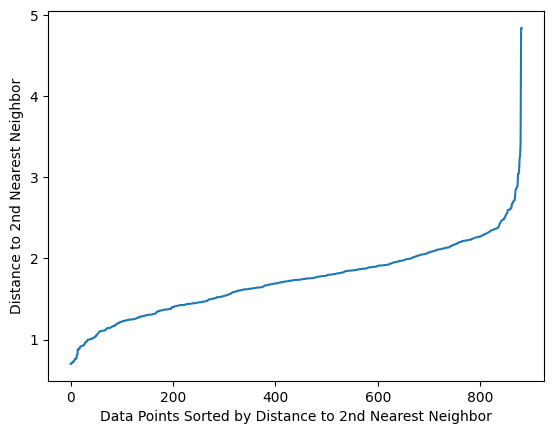

In [48]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

X = dataset1.copy()
X = X.drop('Fertility', axis=1)

# Assuming X is your data
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort and plot the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Data Points Sorted by Distance to 2nd Nearest Neighbor')
plt.ylabel('Distance to 2nd Nearest Neighbor')
plt.show()


In [49]:
result_labels_list_flat = result_labels.values.ravel().tolist()
result_labels_list_flat

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 2,
 2,
 1,
 2,
 2,
 -1,
 2,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 1,
 6,
 -1,
 -1,
 -1,
 -1,
 -1,
 3,
 -1,
 1,
 -1,
 1,
 1,
 -1,
 -1,
 10,
 1,
 3,
 -1,
 -1,
 -1,
 -1,
 1,
 -1,
 -1,
 -1,
 -1,
 2,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,
 1,
 -1,
 1,
 1,
 1,
 1,


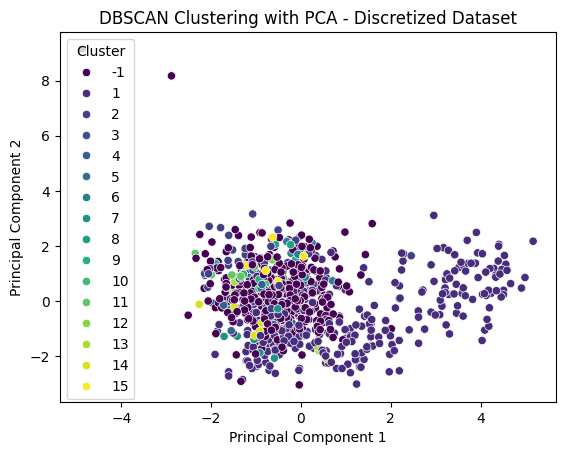

In [50]:
pca = PCA(n_components=2)

X = dataset1.copy()
X = X.drop('Fertility', axis=1)

X_pca = pca.fit_transform(X)

# Convert the reduced dataset to a DataFrame for better visualization
df = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df['Cluster'] = result_labels_list_flat

# Visualize the clusters
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=df, palette='viridis', legend='full')
plt.title('DBSCAN Clustering with PCA - Discretized Dataset')
plt.show()

In [51]:
def choose_classification(method,dataset,eps,min_samples,k_value,init_type,distance_type,num_trees):
    if method=="dbscan":
        return execute_dbscan(dataset,eps,min_samples)
    elif method=="kmeans":
        return execute_kmeans(dataset,k_value,distance_type,init_type)
    elif method=="knn":
        return execute_knn(dataset,distance_type,k_value)
    elif method=="decision_tree":
        return execute_decision_tree(dataset)
    elif method=="random_forest":
        return execute_random_forest(dataset,num_trees)


In [52]:

results_dbscan=choose_classification("dbscan",dataset1,0.3,5,0,0,0,0)
results_kmeans=choose_classification("kmeans",dataset1,0,0,3,kmeans_plusplus_init,'euclidean',0)
results_knn=choose_classification("knn",dataset1,0,0,10,0,"cosine",0)
results_decision_tree=choose_classification("decision_tree",dataset1,0,0,0,0,0,0)
results_random_forest=choose_classification("random_forest",dataset1,0,0,0,0,0,5)


DBSCAN Labels:
 0      1
1      1
2      1
3      1
4      1
      ..
878    1
879    1
880    1
881    1
882    1
Length: 882, dtype: int64
Label Counts:
 1    882
Name: count, dtype: int64
All Predictions: [2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [60]:
import time
def calculate_average_execution_time():
    num_iterations = 10
    total_execution_time = 0

    for _ in range(num_iterations):
        start_time = time.time()
        choose_classification("random_forest",dataset1,0,0,0,0,0,5)
        end_time = time.time()
        execution_time = end_time - start_time
        total_execution_time += execution_time

    average_execution_time = total_execution_time / num_iterations
    return average_execution_time
average_time = calculate_average_execution_time()
print(f"Average Execution Time: {average_time} seconds")

Fertility
Attribute: N
Value High:
Attribute: P
  Value High:
Attribute: S
    Value High:
Leaf Node: 1
    Value Low:
Attribute: Cu
      Value High:
Leaf Node: 1
      Value Low:
Leaf Node: 2
      Value Medium:
Attribute: K
        Value High:
Leaf Node: 1
        Value Low:
Leaf Node: 2
    Value Medium:
Attribute: OC
      Value High:
Leaf Node: 2
      Value Low:
Leaf Node: 1
      Value Medium:
Attribute: K
        Value High:
Leaf Node: 1
        Value Medium:
Leaf Node: 2
  Value Low:
Leaf Node: 1
  Value Medium:
Leaf Node: 1
Value Low:
Attribute: P
  Value High:
Attribute: Zn
    Value High:
Leaf Node: 1
    Value Low:
Attribute: pH
      Value High:
Leaf Node: 0
      Value Low:
Leaf Node: 1
    Value Medium:
Leaf Node: 0
  Value Low:
Attribute: Zn
    Value High:
Leaf Node: 2
    Value Low:
Attribute: S
      Value High:
Attribute: K
        Value Low:
Leaf Node: 1
        Value Medium:
Leaf Node: 0
      Value Low:
Leaf Node: 0
      Value Medium:
Leaf Node: 0
    Value Me

In [54]:
print(results_dbscan)
print(results_kmeans)
print(results_knn)
print(results_decision_tree)
print(results_random_forest)
#results_dbscan
#results_kmeans
#results_knn
#results_decision_tree
#results_random_forest


0      1
1      1
2      1
3      1
4      1
      ..
878    1
879    1
880    1
881    1
882    1
Length: 882, dtype: int64
[2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2

In [55]:
dfdbscan = pd.DataFrame(results_dbscan)
df = pd.DataFrame(results_kmeans)
kmeans_results_stacked = df.stack()
dbscan_results_stacked=dfdbscan.stack()
dfknn=pd.DataFrame(results_knn)
knn_results_stacked = dfknn.stack()

# Display the DataFrame
#print(type(df))
## Transform the DataFrame to a Series using stack()
#series_result = df.stack()
#print("resulsts knn",type(knn_results_stacked))
# Check the type of the result
print(kmeans_results_stacked)
print(results_dbscan)
print(dbscan_results_stacked)

0    0    2
1    0    0
2    0    0
3    0    0
4    0    0
         ..
877  0    2
878  0    2
879  0    2
880  0    2
881  0    2
Length: 882, dtype: int64
0      1
1      1
2      1
3      1
4      1
      ..
878    1
879    1
880    1
881    1
882    1
Length: 882, dtype: int64
0    0    1
1    0    1
2    0    1
3    0    1
4    0    1
         ..
878  0    1
879  0    1
880  0    1
881  0    1
882  0    1
Length: 882, dtype: int64


### Evaluation et Comparaison

### Unsupervised

In [56]:
import numpy as np
import pandas as pd

#result_labels
#results_kmeans
def distance(x1, x2):
    # Function to calculate the Euclidean distance between two points
    return np.linalg.norm(x1 - x2)

def silhouette_coefficient(X, labels):
    """
    Calculate the silhouette coefficient for each point in a dataset.

    Parameters:
    - X: A Pandas DataFrame containing the data.
    - labels: A Pandas Series containing the group labels assigned to each point.

    Returns:
    - silhouette_score: The average silhouette coefficient for the entire dataset.
    """

    # Number of total points
    n = len(X)

    # Number of different groups
    unique_labels = labels.unique()
    num_clusters = len(unique_labels)

    # Initialize the total silhouette coefficient
    silhouette_score = 0.0

    # Iterate over each point
    for i in range(n):
        # Group to which point i belongs
        cluster_i = labels.iloc[i]

        # Calculate the average distance within the group (a(i))
        a_i = np.mean([distance(X.iloc[i], X.iloc[j]) for j in range(n) if labels.iloc[j] == cluster_i and j != i])

        # Initialize the average distance to the neighboring group to a high value
        b_i = np.inf

        # Iterate over each neighboring group
        for cluster_j in unique_labels:
            if cluster_j != cluster_i:
                # Calculate the average distance to the neighboring group (b(i))
                b_i_j = np.mean([distance(X.iloc[i], X.iloc[j]) for j in range(n) if labels.iloc[j] == cluster_j])
                # Update the minimum average distance to the neighboring group
                b_i = min(b_i, b_i_j)

        # Calculate the silhouette coefficient for point i
        silhouette_i = (b_i - a_i) / max(a_i, b_i)

        # Add the silhouette coefficient of point i to the total score
        silhouette_score += silhouette_i

    # Calculate the average silhouette coefficient for the entire dataset
    silhouette_score /= n

    return silhouette_score





In [57]:
#silhouette_score_kmeans = silhouette_coefficient(dataset1,kmeans_results_stacked )
silhouette_score_dbscan = silhouette_coefficient(dataset1,result_labels)
#print(f"The silhouette coefficient for the entire dataset is: {silhouette_score_kmeans}")
print(f"The silhouette coefficient for the entire dataset is: {silhouette_score_dbscan}")


KeyboardInterrupt: 

In [ ]:
def valeurs_matrice_confusion(X_test, y_test, predictions):
    # Reset the index of X_test and y_test
    X_test = X_test.reset_index(drop=True)
    y_test = y_test.reset_index(drop=True)

    predzero_zero = 0
    predzero_one = 0
    predzero_two = 0
    predone_zero = 0
    predone_one = 0
    predone_two = 0
    predtwo_zero = 0
    predtwo_one = 0
    predtwo_two = 0
    total = 0

    for index, example in X_test.iterrows():
        actual = y_test.loc[index]
        prediction = predictions[index]

        if int(prediction) == 0 and int(actual) == 0:
            predzero_zero += 1
        elif int(prediction) == 0 and int(actual) == 1:
            predzero_one += 1
        elif int(prediction) == 0 and int(actual) == 2:
            predzero_two += 1
        elif int(prediction) == 1 and int(actual) == 0:
            predone_zero += 1
        elif int(prediction) == 1 and int(actual) == 1:
            predone_one += 1
        elif int(prediction) == 1 and int(actual) == 2:
            predone_two += 1
        elif int(prediction) == 2 and int(actual) == 0:
            predtwo_zero += 1
        elif int(prediction) == 2 and int(actual) == 1:
            predtwo_one += 1
        elif int(prediction) == 2 and int(actual) == 2:
            predtwo_two += 1
        total += 1

    confusion_data = [
        (predzero_zero, predzero_one, predzero_two),
        (predone_zero, predone_one, predone_two),
        (predtwo_zero, predtwo_one, predtwo_two)
    ]

    print("Predicted 0, Actual 0:", predzero_zero)
    print("Predicted 0, Actual 1:", predzero_one)
    print("Predicted 0, Actual 2:", predzero_two)
    print("Predicted 1, Actual 0:", predone_zero)
    print("Predicted 1, Actual 1:", predone_one)
    print("Predicted 1, Actual 2:", predone_two)
    print("Predicted 2, Actual 0:", predtwo_zero)
    print("Predicted 2, Actual 1:", predtwo_one)
    print("Predicted 2, Actual 2:", predtwo_two)
    print("Total Size:", total)

    return confusion_data

# Example usage
valeurs_matrice_confusion(X_test, y_test, knn_results_stacked)


C:\Users\User\AppData\Local\Temp\ipykernel_2724\1024297939.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(prediction) == 0 and int(actual) == 0:
C:\Users\User\AppData\Local\Temp\ipykernel_2724\1024297939.py:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  elif int(prediction) == 0 and int(actual) == 1:
C:\Users\User\AppData\Local\Temp\ipykernel_2724\1024297939.py:25: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  elif int(prediction) == 0 and int(actual) == 2:
C:\Users\User\AppData\Local\Temp\ipykernel_2724\1024297939.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  elif int(prediction) == 1 and 

Predicted 0, Actual 0: 261
Predicted 0, Actual 1: 57
Predicted 0, Actual 2: 1
Predicted 1, Actual 0: 60
Predicted 1, Actual 1: 296
Predicted 1, Actual 2: 31
Predicted 2, Actual 0: 0
Predicted 2, Actual 1: 0
Predicted 2, Actual 2: 0
Total Size: 706


[(261, 57, 1), (60, 296, 31), (0, 0, 0)]

C:\Users\User\AppData\Local\Temp\ipykernel_2724\1024297939.py:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  if int(prediction) == 0 and int(actual) == 0:
C:\Users\User\AppData\Local\Temp\ipykernel_2724\1024297939.py:23: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  elif int(prediction) == 0 and int(actual) == 1:
C:\Users\User\AppData\Local\Temp\ipykernel_2724\1024297939.py:25: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  elif int(prediction) == 0 and int(actual) == 2:
C:\Users\User\AppData\Local\Temp\ipykernel_2724\1024297939.py:27: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  elif int(prediction) == 1 and 

Predicted 0, Actual 0: 261
Predicted 0, Actual 1: 57
Predicted 0, Actual 2: 1
Predicted 1, Actual 0: 60
Predicted 1, Actual 1: 296
Predicted 1, Actual 2: 31
Predicted 2, Actual 0: 0
Predicted 2, Actual 1: 0
Predicted 2, Actual 2: 0
Total Size: 706


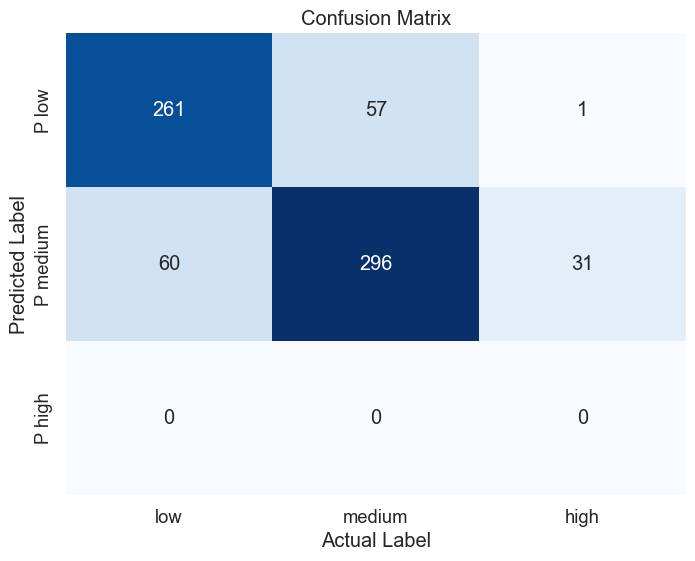

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_conf_mat(confusionmatrix):
    # Convert the data to a NumPy array
    confusion_array = np.array(confusionmatrix)

    # Create a confusion matrix using seaborn
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    confusion_matrix_table = sns.heatmap(confusion_array, annot=True, fmt='d', cmap='Blues', cbar=False,
                                         xticklabels=['low', 'medium', 'high'],
                                         yticklabels=['P low', 'P medium', 'P high'])

    # Add labels and title
    plt.xlabel("Actual Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix")

    # Show the plot
    plt.show()
confusionmatrix_dt=valeurs_matrice_confusion(X_test, y_test, knn_results_stacked)   

plot_conf_mat(confusionmatrix_dt)


In [ ]:

import numpy as np
# Replace these values with your actual values

def mesures_evaluation(confusionmatrix):
    mesures=[]
    # Calculate metrics
    total_samples = np.sum(confusionmatrix)
    true_positive = np.diag(confusionmatrix)
    #print('true positive',true_positive)
    false_positive = np.sum(confusionmatrix, axis=0) - true_positive
    #print('false positive',false_positive)
    false_negative = np.sum(confusionmatrix, axis=1) - true_positive
    #print('false negatif',false_negative)

    accuracy = (true_positive) / total_samples
    # Specificity
    specificity = true_positive / (true_positive + false_positive)

    # Precision
    precision = true_positive / (true_positive + false_positive)

    # Recall (Sensitivity)
    recall = true_positive / (true_positive + false_negative)

    # F1-Score
    f1_score = 2 * (precision * recall) / (precision + recall)
    

    # Print the metrics

    """print("Evaluer et Comparer les modèles pour chaque classe:\n")
    print(f"Accuracy: {accuracy} ")
    print(f"Specificity: {specificity}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1_score}")"""

    # Assuming 'confusion_matrix' is your confusion matrix
    class_counts = np.sum(confusionmatrix, axis=1) 
    #print("class counts: ",class_counts)


    # Calculate global metrics
    # Accuracy
    global_accuracy = np.sum(true_positive) / total_samples
    global_specificity = np.average(specificity, weights=class_counts)
    global_precision = np.average(precision, weights=class_counts)
    global_recall = np.average(recall, weights=class_counts)
    global_f1_score = np.average(f1_score, weights=class_counts)

    # Print the global metrics

    """ print("\n\nEvaluer et Comparer les modèles globalement :\n")
    print(f"Global Accuracy: {global_accuracy:.2%}")
    print(f"Global Specificity: {global_specificity:.2%}")
    print(f"Global Precision: {global_precision:.2%}")
    print(f"Global Recall: {global_recall:.2%}")
    print(f"Global F1-Score: {global_f1_score:.2%}")"""


import numpy as np
import matplotlib.pyplot as plt

def mesures_evaluation(confusionmatrix):
    measures_classwise = {}
    
    # Calculate metrics
    total_samples = np.sum(confusionmatrix)
    true_positive = np.diag(confusionmatrix)
    false_positive = np.sum(confusionmatrix, axis=0) - true_positive
    false_negative = np.sum(confusionmatrix, axis=1) - true_positive
    
    accuracy = (true_positive) / total_samples
    specificity = true_positive / (true_positive + false_positive)
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Save class-wise measures to the dictionary
    for i in range(len(accuracy)):
        measures_classwise[f'Class {i}'] = {
            'Accuracy': accuracy[i],
            'Specificity': specificity[i],
            'Precision': precision[i],
            'Recall': recall[i],
            'F1-Score': f1_score[i]
        }

    # Assuming 'confusion_matrix' is your confusion matrix
    class_counts = np.sum(confusionmatrix, axis=1) 

    # Calculate global metrics
    global_accuracy = np.sum(true_positive) / total_samples
    global_specificity = np.average(specificity, weights=class_counts)
    global_precision = np.average(precision, weights=class_counts)
    global_recall = np.average(recall, weights=class_counts)
    global_f1_score = np.average(f1_score, weights=class_counts)

    # Save global measures to the dictionary
    measures_global = {
        'Global Accuracy': global_accuracy,
        'Global Specificity': global_specificity,
        'Global Precision': global_precision,
        'Global Recall': global_recall,
        'Global F1-Score': global_f1_score
    }

    return measures_classwise, measures_global



measures_classwise_1, measures_global_1 = mesures_evaluation(confusionmatrix_dt)


# Now you have the measures as dictionaries, you can use them for plotting or other analysis.
# For example, let's print the accuracy for each class for both confusion matrices:
print("Class-wise Accuracy for Confusion Matrix 1:")
for class_name, metrics in measures_classwise_1.items():
    print(f"{class_name}: {metrics['Accuracy']:.2%}")



print("mesures globales 1",measures_global_1)



Class-wise Accuracy for Confusion Matrix 1:
Class 0: 36.97%
Class 1: 41.93%
Class 2: 0.00%
mesures globales 1 {'Global Accuracy': 0.7889518413597734, 'Global Specificity': 0.8270308028185059, 'Global Precision': 0.8270308028185059, 'Global Recall': nan, 'Global F1-Score': nan}


C:\Users\User\AppData\Local\Temp\ipykernel_2724\1739583314.py:76: RuntimeWarning: invalid value encountered in divide
  recall = true_positive / (true_positive + false_negative)


# DATASET 2

In [ ]:
dataset2 = load("Dataset2.csv")

## Analyse

In [ ]:
info_dataset(dataset2)

In [ ]:
for attr in dataset2.columns:
    print('COLUMN:', attr)
    aff_nombres_manquants2(dataset2, attr)

In [ ]:
for attr in dataset2.columns:
    if attr != 'end date' and attr != 'Start date':
        print('COLUMN:', attr)
        avg, med, mode = centers(dataset2,attr)
        # Check if avg = med = mode
        print('AVERAGE: ', avg, '...', 'MEDIAN: ', med, 'MODE: ', mode)
        if avg == med == mode:
            print("The average, median, and mode are equal. SYMMETRICAL")
        else:
            print("The average, median, and mode are not equal. NOT SYMMETRICAL")

In [ ]:
for attr in dataset2.columns:
    if attr != 'end date' and attr != 'Start date':
        print('COLUMN:', attr)
        q0, q1, q2, q3, q4 = quartiles(dataset2, attr)
        print('q0: ', q0)
        print('q1: ', q1)
        print('q2: ', q2)
        print('q3: ', q3)
        print('q4: ', q4)

In [ ]:
for attr in dataset2.columns:
    if attr != 'end date' and attr != 'Start date':
        box(dataset2, attr)

In [ ]:
def analyse2(dataset,attr):
    info_dataset(dataset)
    aff_nombres_manquants2(dataset, attr)
    if attr != 'end date' and attr != 'Start date':
        print('COLUMN:', attr)
        avg, med, mode = centers(dataset,attr)
        # Check if avg = med = mode
        print('AVERAGE: ', avg, '...', 'MEDIAN: ', med, 'MODE: ', mode)
        if avg == med == mode:
            print("The average, median, and mode are equal. SYMMETRICAL")
        else:
            print("The average, median, and mode are not equal. NOT SYMMETRICAL")
        q0, q1, q2, q3, q4 = quartiles(dataset, attr)
        print('q0: ', q0)
        print('q1: ', q1)
        print('q2: ', q2)
        print('q3: ', q3)
        print('q4: ', q4)
analyse2(dataset2,'zcta')
    

## Pretraitement


In [ ]:
def replace_missing(dataset, attr):
    # Replace NaN with the mean of the column
    mean_value = dataset[attr].astype(float).mean()
    dataset[attr] = dataset[attr].astype(float).fillna(mean_value)

    # Verify the changes
    return dataset

# Use the original dataset to verify changes
for attr in dataset2.columns:
    if attr != 'end date' and attr != 'Start date':
        dataset2 = replace_missing(dataset2.copy(), attr)  # Use copy to avoid modifying the original dataset
print(dataset2)

for attr in dataset2.columns:
    print('COLUMN:', attr)
    aff_nombres_manquants2(dataset2, attr)

In [ ]:
def box_treat_outliers(dataset, attr):
    x = dataset[attr].copy()  # Make a copy of the column
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    val = 1.5 * (q3 - q1)
    below_q1 = q1 - val
    print('below: ', below_q1.astype(x.dtype))
    above_q3 = q3 + val
    print('above: ', above_q3.astype(x.dtype))
    
    # Replace outliers with below_q1 or above_q3
    x.loc[x < below_q1] = below_q1.astype(x.dtype)
    x.loc[x > above_q3] = above_q3.astype(x.dtype)
    
    dataset[attr] = x
    return dataset


# plt.show()  # Display the box plot for each attribute
for attr in dataset2.columns:
    if attr != 'end date' and attr != 'Start date':
        dataset2 = box_treat_outliers(dataset2, attr)
box(dataset2,'zcta')

In [ ]:
from datetime import datetime

def convert_date(date_str):
    formats_to_try = ["%b-%d", "%m/%d/%Y", "%d-%b", "%d-%b-%Y", "%d-%b-%y", "%d-%b-%Y"]
    
    for date_format in formats_to_try:
        try:
            date_obj = datetime.strptime(date_str, date_format)
            # If the format is "%b-%d", add the year 2023
            if "%b" in date_format:
                date_obj = date_obj.replace(year=2023)
            formatted_date = date_obj.strftime("%m/%d/%Y")
            return formatted_date
        except ValueError:
            continue
    
    # If none of the formats match, return the original string
    return date_str

# Example usage:
# dataset = pd.DataFrame({'Start date': ['10/11/2020', '5/30/2021', '3/28/2021', 'feb-25', '6/20/2021', '1-May', '24-Jul', '12-Jun', '28-Jun', '20-Mar']})

# Apply the convert_date function to the 'Start date' column
dataset2['Start date'] = dataset2['Start date'].apply(convert_date)
dataset2['end date'] = dataset2['end date'].apply(convert_date)

# Display the modified DataFrame
print(dataset2['Start date'])
print(dataset2['end date'])

In [ ]:
def preprocessing2(dataset):
    dataset = load("Dataset2.csv")
    for attr in dataset.columns:
        if attr != 'end date' and attr != 'Start date':
            dataset = replace_missing(dataset.copy(), attr)  # Use copy to avoid modifying the original dataset
    print(dataset)
    for attr in dataset.columns:
        if attr != 'end date' and attr != 'Start date':
            dataset = box_treat_outliers(dataset, attr)
    dataset['Start date'] = dataset['Start date'].apply(convert_date)
    dataset['end date'] = dataset['end date'].apply(convert_date)
    return dataset
dataset2=preprocessing2(dataset2)
print(dataset2['Start date'])
print(dataset2['end date'])
for attr in dataset2.columns:
    print('COLUMN:', attr)
    aff_nombres_manquants2(dataset2, attr)
box(dataset2,'case count')

## Visualisation

In [ ]:
import seaborn as sns
import pandas as pd
def case_by_zone(dataset):
    # Assuming you have already imported pandas and loaded your data into the 'df' DataFrame

    # Create a new DataFrame with the total cases and positive tests per zone
    total_df = dataset.groupby('zcta')[['case count', 'positive tests']].sum().reset_index()

    # Sort the DataFrame by the total cases
    total_df = total_df.sort_values(by='case count', ascending=False)

    # Set the figure size
    plt.figure(figsize=(12, 6))

    # Use seaborn's barplot to create a grouped bar chart
    sns.barplot(x='zcta', y='value', hue='variable', data=pd.melt(total_df, id_vars=['zcta'], value_vars=['case count', 'positive tests']))

    # Add labels and title
    plt.title('Distribution du nombre total de cas confirmés et tests positifs par zone')
    plt.xlabel('Zone')
    plt.ylabel('Nombre total')
    plt.xticks(rotation=90)

    # Show the legend
    plt.legend(title='Type')

    # Show the plot
    plt.show()
case_by_zone(dataset2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def zone_by_time(dataset, zone):
    # Replace 'NomDeVotreZone' with the name of the zone you want to analyze
    zone_choisie = zone

    # Select data for the chosen zone
    zone_data = dataset[dataset['zcta'] == zone_choisie]

    # Uncomment the following lines if you want to print the data for debugging purposes
    # print(zone_data)
    # print(zone_data['Start date'])

    # Convert the 'Start date' column to datetime
    zone_data = zone_data.copy()
    zone_data['Start date'] = pd.to_datetime(zone_data['Start date'])

    # Choose the aggregation period (weekly, monthly, yearly)
    periods = ['W', 'M', 'A']

    # Create a line chart for each period
    plt.figure(figsize=(12, 8))

    for period in periods:
        # Aggregate data by the specified period using the resample function
        agg_data = zone_data.set_index('Start date').resample(period).agg({
            'test count': 'sum',
            'positive tests': 'sum',
            'case count': 'sum'
        }).reset_index()

        # Check if there are enough data points for the current period
        if len(agg_data) > 0:
            # Line Chart
            sns.lineplot(x='Start date', y='test count', data=agg_data, label=f'Tests COVID-19 ({period})', marker='o')
            sns.lineplot(x='Start date', y='positive tests', data=agg_data, label=f'Tests Positifs ({period})', marker='o')
            sns.lineplot(x='Start date', y='case count', data=agg_data, label=f'Nombre de Cas ({period})', marker='o')

    # Add labels and a title
    plt.title(f'Évolution des tests COVID-19, tests positifs et nombre de cas pour la zone {zone_choisie}')
    plt.xlabel('Date')
    plt.ylabel('Nombre')
    plt.legend()
    plt.show()

# Assuming dataset2 is your DataFrame
zone_by_time(dataset2, 95127)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Comment les cas covid positifs sont distribués par zone et par année ? (Indication : Stacked
# Bar chart)

def visualisation_3(dataset):

    # Convertir la colonne 'Start date' en datetime si ce n'est pas déjà fait
    dataset['Start date'] = pd.to_datetime(dataset['Start date'], errors='coerce')

    # Extraire l'année de la colonne 'Start date'
    dataset['Year'] = dataset['Start date'].dt.year
    

    # Créer un graphique à barres empilées (stacked bar chart)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Year', y='positive tests', hue='zcta', data=dataset, estimator=sum, ci=None)
    plt.title('Distribution des cas COVID-19 positifs par zone et par année')
    plt.xlabel('Année')
    plt.ylabel('Nombre total de cas positifs')
    plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

    # Afficher le graphique
    plt.show()

visualisation_3(dataset2)

In [ ]:
def visualisation_4(dataset):
    # Calculer le rapport moyen par zone
    dataset['Rapport Population/Test'] = dataset['population'] / dataset['test count']

    # Créer un graphique à barres
    plt.figure(figsize=(12, 8))
    sns.barplot(x='zcta', y='Rapport Population/Test', data=dataset, palette='viridis')
    plt.title('Rapport Moyen entre la Population et le Nombre de Tests par Zone')
    plt.xlabel('Zone')
    plt.ylabel('Rapport Population/Test')
    plt.xticks(rotation=90)

    # Afficher le graphique
    plt.show()
visualisation_4(dataset2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def visualisation_5(dataset):
    # Grouper par zone et calculer le nombre total de cas confirmés
    total_cases_by_zone = dataset.groupby('zcta')['case count'].sum().reset_index()

    # Trier par ordre décroissant pour obtenir les zones les plus touchées en premier
    total_cases_by_zone = total_cases_by_zone.sort_values(by='case count', ascending=False)

    # Afficher les 5 zones les plus touchées
    top_5_zones = total_cases_by_zone.head(5)
    print(top_5_zones)

    # Trier les données par ZCTA avant de tracer le graphique
    top_5_zones = top_5_zones.sort_values(by='zcta')

    # Plot un graphique en ligne des 5 zones les plus touchées
    plt.plot(top_5_zones['zcta'], top_5_zones['case count'], marker='o', linestyle='-')
    plt.xlabel('ZCTA')
    plt.ylabel('Nombre de cas confirmés')
    plt.title('Top 5 des zones les plus touchées')
    plt.show()

visualisation_5(dataset2)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def visualisation_6(dataset,start_date,end_date):

    # Convertir la colonne 'Start date' en datetime si ce n'est pas déjà fait
    dataset['Start date'] = pd.to_datetime(dataset['Start date'], errors='coerce')

    # Choisir la période que vous souhaitez analyser
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Filtrer le DataFrame pour la période sélectionnée
    dataset_period = dataset[(dataset['Start date'] >= start_date) & (dataset['Start date'] <= end_date)]

    # Créer des graphiques pour chaque métrique
    plt.figure(figsize=(12, 8))

    # Cas Confirmés au fil du temps par zone
    plt.subplot(3, 1, 1)
    sns.lineplot(x='Start date', y='case count', hue='zcta', data=dataset_period)
    plt.title('Cas Confirmés au fil du temps par Zone')
    plt.xlabel('Date')
    plt.ylabel('Nombre de Cas Confirmés')
    plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

    # Tests Effectués au fil du temps par zone
    plt.subplot(3, 1, 2)
    sns.lineplot(x='Start date', y='test count', hue='zcta', data=dataset_period)
    plt.title('Tests Effectués au fil du temps par Zone')
    plt.xlabel('Date')
    plt.ylabel('Nombre de Tests Effectués')
    plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

    # Tests Positifs au fil du temps par zone
    plt.subplot(3, 1, 3)
    sns.lineplot(x='Start date', y='positive tests', hue='zcta', data=dataset_period)
    plt.title('Tests Positifs au fil du temps par Zone')
    plt.xlabel('Date')
    plt.ylabel('Nombre de Tests Positifs')
    plt.legend(title='Zone', bbox_to_anchor=(1, 1), loc='upper left')

    # Ajuster l'espacement entre les graphiques
    plt.tight_layout()

    # Afficher les graphiques
    plt.show()

visualisation_6(dataset2,'2022-01-01','2022-12-31')

# DATASET 3

In [ ]:
dataset3 = load_excel("Dataset3.xlsx")

## Analyse

In [ ]:
dataset3.info()

## Pretraitement

In [ ]:
temperature_labels = ['Low Temperature', 'Medium Temperature', 'High Temperature']
humidity_labels = ['Low Humidity', 'Moderate Humidity', 'High Humidity']
rainfall_labels = ['Low Rainfall', 'Moderate Rainfall', 'High Rainfall']

### Equal frequency

In [ ]:
import math
import pandas as pd


def categorize_freq(dataset, labels):
    categories = []
    dataset_sorted = dataset.sort_values()
    dataset_length = len(dataset_sorted)

    for i in range(len(labels)):
        min_val_index = int(dataset_length * i / len(labels))
        max_val_index = int(dataset_length * (i + 1) / len(labels))
        interval = dataset_sorted[min_val_index:max_val_index]
        categories.append((interval, labels[i]))

    return categories

def discretise_freq(dataset, attr, labels):
    dataset_sorted = dataset.sort_values(by=attr)
    x = dataset_sorted[attr]
    
    # categorize
    categories = categorize_freq(x, labels)
    # print(categories)

    # replace values with labels
    for i, (category, label) in enumerate(categories):
        categories[i] = pd.Series([label] * len(category), index=category.index)

    # combine all categories back into a single Series
    new_dataset = pd.concat(categories)
    dataset[attr] = new_dataset

    return dataset

### Equal width


In [ ]:
import math
import pandas as pd

def calculate_range_width(dataset, k):
    min_val = dataset.quantile(0)
    max_val = dataset.quantile(1)
    range_width = (max_val - min_val) / k
    return range_width

def categorize_width(dataset, range_width, labels):
    categories = []
    min_val = dataset.min()

    for i, label in enumerate(labels):
        max_val = min_val + range_width
        if i == len(labels) - 1:  # for the last category, include the maximum value in the range
            interval = dataset[(dataset >= min_val) & (dataset <= max_val)]
        else:
            interval = dataset[(dataset >= min_val) & (dataset < max_val)]

        categories.append((interval, label))
        min_val = max_val

    return categories

def discretise_width(dataset, attr, labels):
    dataset_sorted = dataset.sort_values(by=attr)
    x = dataset_sorted[attr]


    # calculate the width of the range
    range_width = calculate_range_width(x, len(labels))

    # categorize
    categories = categorize_width(x, range_width, labels)

    # replace values with labels
    for i, (category, label) in enumerate(categories):
        categories[i] = pd.Series([label] * len(category), index=category.index)

    # combine all categories back into a single Series
    new_dataset = pd.concat(categories)

    dataset[attr] = new_dataset

    return dataset

In [ ]:
def preprocessing3(dataset,discretisemethod):
    dataset = load_excel("Dataset3.xlsx")
    temperature_labels = ['Low Temperature', 'Medium Temperature', 'High Temperature']
    humidity_labels = ['Low Humidity', 'Moderate Humidity', 'High Humidity']
    rainfall_labels = ['Low Rainfall', 'Moderate Rainfall', 'High Rainfall']
    if discretisemethod == "equalfrequency":
        dataset = discretise_freq(dataset.copy(), 'Temperature', temperature_labels)
        dataset = discretise_freq(dataset.copy(), 'Humidity', humidity_labels)
        dataset = discretise_freq(dataset.copy(), 'Rainfall', rainfall_labels)     
    elif discretisemethod == "equalwidth":
        dataset = discretise_width(dataset.copy(), 'Temperature', temperature_labels)
        dataset = discretise_width(dataset.copy(), 'Humidity', humidity_labels)
        dataset = discretise_width(dataset.copy(), 'Rainfall', rainfall_labels)
    return dataset

    


In [ ]:
dataset3=preprocessing3(dataset3,"equalwidth")

## Recommandation

In [ ]:
def organise(dataset):
    dataset['TH'] = pd.concat([dataset['Temperature'].astype(str), dataset['Humidity']], axis=1).agg(' '.join, axis=1)
    dataset['THR'] = pd.concat([dataset['TH'].astype(str), dataset['Rainfall']], axis=1).agg(' '.join, axis=1)
    dataset['Conditions'] = pd.concat([dataset['THR'].astype(str), dataset['Soil']], axis=1).agg(' '.join, axis=1)

    dataset['Item'] = pd.concat([dataset['Crop'].astype(str), dataset['Fertilizer']], axis=1).agg(' '.join, axis=1)
    dataset['THR'] = pd.concat([dataset['TH'].astype(str), dataset['Rainfall']], axis=1).agg(' '.join, axis=1)
    return dataset


In [ ]:
dataset3=organise(dataset3)
dataset3

In [ ]:
def create_transactions(dataset):
    # Group by 'Watcher' and aggregate the 'videoCategoryLabel' values into lists
    agriculture_df = dataset.groupby('Conditions')['Item'].apply(list).reset_index()
    agriculture_df['Item'] = agriculture_df['Item'].apply(lambda x: list(set(x)))

    # Rename columns for clarity
    agriculture_df.columns = ['Conditions', 'Items']

    # Display the modified DataFrame
    agriculture_df
    return agriculture_df
dataset3=create_transactions(dataset3)

In [ ]:
dataset3

In [ ]:
def apriori(agriculture_df, min_support):# Function to generate k-itemsets candidates (Ck)
    
    def generate_L1(data, k):
        candidates = []
        for itemset in data:
            for candidate in combinations(itemset, k):
                candidates.append(tuple(sorted(candidate)))
        candidates=set(candidates)
        itemset_counts = calculate_support(data, candidates, min_support)    
        frequent_itemsets = {itemset: count for itemset, count in itemset_counts.items() if count >= min_support}
        return frequent_itemsets
    
    def generate_candidates_k(data, k, frequent_itemsets_prev):
        candidates = []
        
        # Generate candidate pairs from frequent_itemsets_prev
        candidate_pairs = list(combinations(frequent_itemsets_prev, 2))
        
        for itemset in data:
            # Generate candidate sets by union of items in each pair
            for pair in candidate_pairs:
                candidate_set = set(pair[0]).union(set(pair[1]))
                
                # Check if the candidate set meets the size and subset conditions
                if len(candidate_set) == k and all(subset in frequent_itemsets_prev for subset in combinations(candidate_set, k-1)):
                    candidates.append(tuple(sorted(candidate_set)))
        
        return set(candidates)
    def calculate_support(data, candidates, min_support):
        itemset_counts = {}
        num_itemsets = len(data)
        
        for candidate in candidates:
            for itemset in data:
                if set(candidate).issubset(set(itemset)):
                    itemset_counts[candidate] = itemset_counts.get(candidate, 0) + 1
        
        return itemset_counts

    # Function to generate frequent k-itemsets (Lk)
    def generate_frequent_itemsets_k(data, k, min_support, frequent_itemsets_prev):
        candidates = generate_candidates_k(data, k, frequent_itemsets_prev)
        
        itemset_counts = calculate_support(data, candidates, min_support)
        frequent_itemsets = {itemset: count for itemset, count in itemset_counts.items() if count >= min_support}
        
        return frequent_itemsets
    # Sample data (use your transformed dataset)
    data = agriculture_df['Items']
    all_frequent_itemsets = []

    # Initialize L1 with frequent items
    frequent_itemsets_prev = generate_L1(data, 1)

    print('Frequent 1-itemsets:')
    for itemset, support in frequent_itemsets_prev.items():
        print(f'{itemset}: Support = {support:.2f}')
        all_frequent_itemsets.append((itemset, support))
    print('\n\n')

    # Apply Apriori algorithm to find frequent itemsets of different sizes (k)
    k = 2
    while True:
        frequent_itemsets = generate_frequent_itemsets_k(data, k, min_support, frequent_itemsets_prev)
        
        if not frequent_itemsets:  # Stop when frequent_itemsets is empty
            break
        
        frequent_itemsets_prev = frequent_itemsets  # Update the frequent itemsets for the next iteration
        
        print(f'Frequent {k}-itemsets:')
        for itemset, support in frequent_itemsets.items():
            print(f'{itemset}: Support = {support:.2f}')
            all_frequent_itemsets.append((itemset, support))
        
        print('\n\n')
        
        k += 1

    print('\nall_frequent_itemsets:')

    print(all_frequent_itemsets)
    return all_frequent_itemsets





In [ ]:
def run_apriori(dataset, min_support,discretise_method):
    dataset=preprocessing3(dataset,discretise_method)
    dataset = organise(dataset)
    agriculture_df = create_transactions(dataset)
    number_of_transactions = len(agriculture_df['Conditions'])
    print('NUM TRANS = ', number_of_transactions)
    min_supp = min_support * number_of_transactions
    print('MIN SUPP = ', min_supp)
    all_frequent_itemsets = apriori(agriculture_df, min_supp)
    return all_frequent_itemsets, agriculture_df

In [ ]:
all_frequent_itemsets, dataset3 = run_apriori(dataset3, 0.1,"equalfrequency")

### Association Rules

In [ ]:
from itertools import chain, combinations

def generate_association_rules(frequent_itemsets):
    association_rules = set()

    for itemset,_  in frequent_itemsets:
        if len(itemset) > 1:
            itemset = frozenset(itemset)

            for antecedent_size in range(1, len(itemset)):
                for antecedent in combinations(itemset, antecedent_size):
                    antecedent = frozenset(antecedent)
                    consequent = itemset - antecedent

                    # Check if the rule already exists or its reverse exists
                    if (antecedent, consequent) not in association_rules :
                        association_rules.add((antecedent, consequent))

    return association_rules


In [ ]:
from math import sqrt

def calculate_confidence(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    # print('ant',antecedent_tuple)
    consequent_tuple = tuple(sorted(consequent))
    # print('cons',consequent_tuple)

    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    # print('combined',combined_itemset)
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    # print('antecedent_support',antecedent_support)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)
    # print('combined support',combined_support)
    confidence = combined_support / antecedent_support if antecedent_support != 0 else 0
    return confidence
def calculate_all_confidence(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    max_support = max(antecedent_support, consequent_support)

    all_confidence = combined_support / max_support if max_support != 0 else 0
    return all_confidence
def calculate_max_confidence(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    max_confidence = max(combined_support/antecedent_support ,combined_support /  consequent_support)
    # Ensure the value is between 0 and 1
    #max_confidence = min(max_confidence, 1.0)

    return max_confidence
def calculate_cosine_similarity(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    cosine_similarity = combined_support/ sqrt(antecedent_support * consequent_support) if antecedent_support != 0 and consequent_support != 0 else 0
    return cosine_similarity
def calculate_jaccard_similarity(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    jaccard_similarity = combined_support / (antecedent_support+consequent_support-combined_support) 

    return jaccard_similarity
def calculate_kulczynski_similarity_union(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))
    combined_itemset = antecedent_tuple + consequent_tuple
    combined_itemset = tuple(sorted(combined_itemset))
    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)
    combined_support = next((support for itemset, support in all_frequent_itemsets if itemset == combined_itemset), 0)

    kulczynski_similarity = 0.5 * (combined_support / antecedent_support + combined_support / consequent_support) if antecedent_support != 0 and consequent_support != 0 else 0
    return kulczynski_similarity
def calculate_lift(rule, all_frequent_itemsets):
    antecedent, consequent = rule
    antecedent_tuple = tuple(sorted(antecedent))
    consequent_tuple = tuple(sorted(consequent))

    antecedent_support = next((support for itemset, support in all_frequent_itemsets if itemset == antecedent_tuple), 0)
    consequent_support = next((support for itemset, support in all_frequent_itemsets if itemset == consequent_tuple), 0)

    confidence = calculate_confidence(rule, all_frequent_itemsets)
    
    lift = confidence / consequent_support if consequent_support != 0 else 0
    return lift

In [ ]:
# Example usage
all_frequent_itemsets, dataset3 = run_apriori(dataset3, 0.1,"equalfrequency")
association_rules = generate_association_rules(all_frequent_itemsets)

# Print the generated association rules
for rule in association_rules:
    confidence = calculate_lift(rule, all_frequent_itemsets)
    print(f"Rule: {rule}, Confidence: {confidence}")

In [ ]:
import re
def fortes_regles_association(mesure_correlation,min_confidence,all_frequent_itemsets, association_rules):

    pattern = re.compile(r'frozenset\((.*?)\)')
    fortes_regles=[]
    for rule in association_rules:
        confidence = mesure_correlation(rule, all_frequent_itemsets)
        if (confidence >= min_confidence) :
            text=(f"Rule: {rule},conf: {confidence}")
            transformed_text = re.sub(pattern, r'\1', text) 
            fortes_regles.append(transformed_text)  
    print('SIZEEEEEEEEEEEEEEEEEEEEEEEE ', len(fortes_regles))
    return fortes_regles
 

In [ ]:
def run_all(dataset,discretise_method, conf_method,min_support,min_conf):
    all_frequent_itemsets,dataset=run_apriori(dataset, min_support,discretise_method)
    association_rules = generate_association_rules(all_frequent_itemsets)
    fortes_regles = fortes_regles_association(conf_method,min_conf,all_frequent_itemsets, association_rules)
    print(fortes_regles_association)
    for regle in fortes_regles:
        print('{', regle, '}')
    return dataset, fortes_regles,association_rules

    

In [ ]:
run_all( dataset3,"equalfrequency", calculate_kulczynski_similarity_union, 0.1, 0.6)

In [ ]:
import numpy as np

start_value = 0.0
end_value = 1.0
step_size = 0.1

min_supp = np.arange(start_value, end_value + step_size, step_size)
print(min_supp)
min_conf = np.arange(start_value, end_value + step_size, step_size)
print(min_conf)
supp_list = []
conf_list = []
recc_list = []
for supp in min_supp:
    for conf in min_conf:
            dataset3, recommendations,association_rules = run_all( dataset3,"equalfrequency", calculate_kulczynski_similarity_union, supp, conf) 
            supp_list.append(supp)
            conf_list.append(conf)
            recc_list.append(len(recommendations))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Assuming you have supp_list, conf_list, and recc_list defined

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with support, confidence, and recommendations length
scatter = ax.scatter(supp_list, conf_list, recc_list, c=recc_list, cmap=cm.plasma)

# Set axis labels
ax.set_xlabel('Support')
ax.set_ylabel('Confidence')
ax.set_zlabel('Recommendations Length')

# Add a colorbar to show the mapping of colors to values
cbar = fig.colorbar(scatter, ax=ax, label='Recommendations Length')

# Show the plot
plt.show()

### Recommandation

In [ ]:
def recommendation(min_support,dataset,descretize_method,conf_method, temperature, humidity, rainfall, soil, crop, fertilizer):
    all_frequent_itemsets, dataset3 = run_apriori(dataset,min_support,descretize_method)
    
    new_row = pd.Series({
        'Temperature': temperature,
        'Humidity': humidity,
        'Rainfall': rainfall,
        'Soil': soil,
        'Crop': crop,
        'Fertilizer': fertilizer
    })
    
    target_antecedent = (crop+' '+fertilizer)

    # Check the type of dataset and its attributes
    print(f"Type of dataset: {type(dataset)}")
    print(f"Columns of dataset: {dataset.columns if isinstance(dataset, pd.DataFrame) else None}")
    
    consequents=[]
    # Append the new row
    dataset = pd.concat([dataset, new_row.to_frame().transpose()], ignore_index=True)
    agriculture_all, recommendations,association_rules = run_all(dataset.copy(),descretize_method,conf_method, 0.1, 0.1) 
    
    for rule in association_rules:

        antecedent, consequent = rule

        # Check if the rule already exists or its reverse exists
        if target_antecedent in antecedent:
            conf=calculate_confidence(rule, all_frequent_itemsets)
            consequents.append((antecedent,consequent,conf))
    
    print('consequents')
    print(consequents)
    # Trier la liste par la confiance (de la plus grande à la plus petite)
    sorted_consequent = sorted(consequents, key=lambda x: x[1], reverse=True)
    print('\nTEST',sorted_consequent)
    top_results = sorted_consequent[:5]
    print('top results',top_results)


    return dataset,top_results




In [ ]:
new_dataset,recommandations = recommendation(
    0.3,
    dataset3,
    "equalfrequency",
    calculate_kulczynski_similarity_union,
    temperature=25.5,
    humidity=60.0,
    rainfall=1.2,
    soil='Loam',
    crop='Coconut',
    fertilizer='DAP'
)



In [ ]:
recommandations